### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
#tf.config.run_functions_eagerly(True)

print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x000001D1F8B410D0>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 3: Neural networks

***

## Importe modules

In [2]:
import librosa
#import librosa.display
import os
import warnings
#import random
#import sklearn
#import itertools
#import time
#import sys

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt
from keras       import backend as K

#from tqdm                        import tqdm
from collections                 import Counter

from sklearn                     import metrics
#from sklearn.model_selection     import StratifiedKFold, StratifiedShuffleSplit, KFold, GridSearchCV, train_test_split
from sklearn.metrics             import confusion_matrix, classification_report
#from sklearn.decomposition       import PCA

from tensorflow                  import keras
from tensorflow.keras.models     import Sequential, load_model
from tensorflow.keras.layers     import Dense, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Flatten, GlobalMaxPooling1D
#from tensorflow.keras            import initializers

from keras.callbacks             import ModelCheckpoint, EarlyStopping
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers          import l2



warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '06_Neural_network_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050

## Loading the dataset


In [4]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_pic    = os.path.join(current_path, "ESC-10_results")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    
   
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'ESC-10' 
    csv_file    = 'ESC-10.csv'
    fold        = '1'

    pkl_features          = 'ESC-10_features_original.pkl'
    pkl_aug_features      = 'ESC-10_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'ESC-10_features_augmented.pkl'

    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_pic    = os.path.join(current_path, "BDLib2_results")
    path_models = os.path.join(current_path, "BDLib2_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'BDLib2' 
    csv_file    = 'BDLib2.csv'
    fold        = 'fold-1'

    pkl_features          = 'BDLib2_features_original.pkl'
    pkl_aug_features      = 'BDLib2_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'BDLib2_features_augmented.pkl'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_pic    = os.path.join(current_path, "US8K_results")
    path_models = os.path.join(current_path, "US8K_saved_models")
    
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K' 
    csv_file    = 'US8K.csv'
    fold        = '1'
    
    pkl_features          = 'US8K_features_original.pkl'
    pkl_aug_features      = 'US8K_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large
    

if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_pic    = os.path.join(current_path, "US8K_AV_results")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K_AV' 
    csv_file    = 'US8K_AV.csv'
    fold        = '1'

    pkl_features          = 'US8K_AV_features_original.pkl'
    pkl_aug_features      = 'US8K_AV_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_AV_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 1


In [5]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [6]:
from MT_loadDataset import loadDataset

In [7]:
loadDataset = loadDataset(path)
DB          = loadDataset.db_B

print("\nClasses:\n--------------------")
print(DB["Class_categorical"].value_counts())
print("\nTotal number of unique files..........: ", len(np.unique(DB["File_name"])))
print("Total number of AUDIO files...........: ", len(DB))
DB


CSV exported.
Check the folder :  C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10

Classes:
--------------------
Class_categorical
Dog bark          40
Rain              40
Sea waves         40
Baby cry          40
Clock tick        40
Person sneeze     40
Helicopter        40
Chainsaw          40
Rooster           40
Fire crackling    40
Name: count, dtype: int64

Total number of unique files..........:  400
Total number of AUDIO files...........:  400


,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path,Class_ID,Clip_ID,Clip_take
0,1,001 - Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Dog bark,1-100032-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\001 - Dog bark\1-100032-A.ogg,1,100032,A
1,1,001 - Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Dog bark,1-110389-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\001 - Dog bark\1-110389-A.ogg,1,110389,A
2,1,001 - Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Dog bark,1-30226-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\001 - Dog bark\1-30226-A.ogg,1,30226,A
3,1,001 - Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Dog bark,1-30344-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\001 - Dog bark\1-30344-A.ogg,1,30344,A
4,1,001 - Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Dog bark,1-32318-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\001 - Dog bark\1-32318-A.ogg,1,32318,A
...,...,...,...,...,...,...,...,...,...
395,5,010 - Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",Fire crackling,5-193473-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\010 - Fire crackling\5-193473-A.ogg,10,193473,A
396,5,010 - Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",Fire crackling,5-193473-B.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\010 - Fire crackling\5-193473-B.ogg,10,193473,B
397,5,010 - Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",Fire crackling,5-213802-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\010 - Fire crackling\5-213802-A.ogg,10,213802,A
398,5,010 - Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",Fire crackling,5-215658-A.ogg,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\ESC-10\010 - Fire crackling\5-215658-A.ogg,10,215658,A


In [8]:
DB.dtypes

Fold                  int64
Folder_name          object
Class_OHEV           object
Class_categorical    object
File_name            object
Path                 object
Class_ID              int64
Clip_ID               int64
Clip_take            object
dtype: object

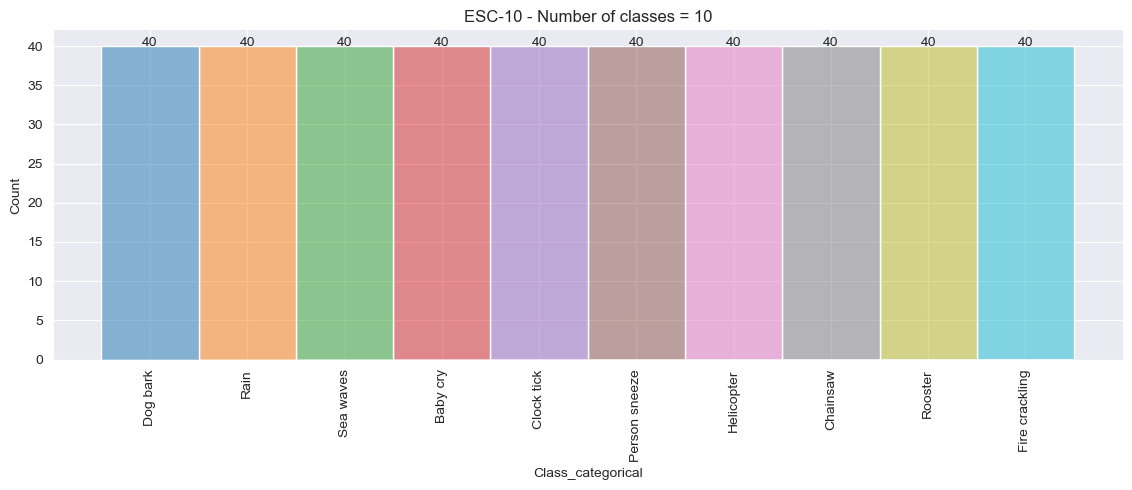

In [9]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = f'{nom_dataset} - Number of classes = ' + str(len(pd.Series(DB['Class_categorical']).unique()))
g = sns.displot(DB,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()

In [10]:
# Read the pkl file with the augmented features extracted

opc = 0
while str(opc) not in '123':
    print()
    print("1-) Features original")
    print("2-) Features augmented")
    print("3-) Features augmented and windowed (US8K only windowed)")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_features))
    model_surname = '_original'

if opc == 2:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_aug_features))
    model_surname = '_augmented'

if opc == 3:
    DB_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
    model_surname = '_windowed'


1-) Features original
2-) Features augmented
3-) Features augmented and windowed (US8K only windowed)

Select the dataset: 1


In [11]:
DB_from_pkl.dtypes

Audio                  object
Class_categorical      object
Class_OHEV             object
Fold                   object
RMSE                  float64
                       ...   
TONNETZ_6             float64
TONNETZ_std_6         float64
TONNETZ_median_6      float64
TONNETZ_skew_6        float64
TONNETZ_kurtosis_6    float64
Length: 379, dtype: object

In [12]:
total_duration = 0
for audio in DB_from_pkl['Audio']:
    total_duration = total_duration + librosa.get_duration(y=audio)
print('Total duration of the dataset: ' , "{:0.4f} h".format(total_duration / 3600))

Total duration of the dataset:  0.5556 h


In [13]:
DB_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-1.3767974e-05, 6.560702e-06, 1.5261583e-05, 2.7101487e-07, -3.189547e-06, 1.5014208e-05, 5.1874667e-06, -9.778421e...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.025425,-0.026296,-0.531440,-0.343371
1,"[-0.0015367204, -0.0004744595, -0.00023626443, -0.0003487179, -6.3199084e-05, -7.6471595e-05, 0.00013974216, 0.00018...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.022231,0.002372,-1.381150,2.071973
2,"[-0.0072659636, -0.01090739, -0.009381778, -0.010274444, -0.009296817, -0.009827967, -0.009601067, -0.00977385, -0.0...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.030027,-0.005855,-0.297478,-0.709419
3,"[-0.00019857194, -0.00022303371, -0.00032965082, -0.0005635341, -0.0006325695, -0.0006501522, -0.0007629838, -0.0008...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.053246,-0.022612,2.323998,7.256435
4,"[0.007044793, 0.010916248, 0.010607904, 0.011737926, 0.011549781, 0.013294231, 0.013100689, 0.01324819, 0.013393954,...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.039181,-0.011024,-0.816034,3.927710
...,...,...,...,...,...,...,...,...,...
395,"[8.755894e-05, 6.688332e-05, 6.425771e-05, 9.546602e-05, 6.53247e-05, 5.9457394e-05, 2.2577256e-05, 4.647161e-05, 6....",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.018624,0.002901,0.727124,1.020775
396,"[-0.0011081514, -0.0015953752, -0.0010865985, -0.00022670862, -0.00089606555, 0.00047600298, -0.0018381721, -0.00146...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.017107,-0.002157,0.320365,-0.319131
397,"[0.038042173, 0.10589701, 0.030117664, 0.058622308, 0.09430585, 0.047644228, 0.08971812, 0.10753698, 0.083254755, 0....",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.022239,0.011849,0.357041,-0.529717
398,"[0.00012540631, 1.7224811e-06, 0.00029374193, 0.00030114595, 0.00011787936, 0.0002513323, 8.1106555e-05, 0.000109463...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.022723,0.002698,-0.270733,-0.590341


In [14]:
print(type(DB_from_pkl['Fold'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0]))


<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


## Input split

In [15]:
# Separate 1 fold for validation and create a DB for the training / testing according to the datasets specification

DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()

In [16]:
print(len(DB_from_pkl_VAL))
print(len(DB_from_pkl_TRN))
print('Total: ', len(DB_from_pkl_VAL) + len(DB_from_pkl_TRN),'\n')

80
320
Total:  400 



In [17]:
DB_from_pkl_VAL

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-1.3767974e-05, 6.560702e-06, 1.5261583e-05, 2.7101487e-07, -3.189547e-06, 1.5014208e-05, 5.1874667e-06, -9.778421e...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.025425,-0.026296,-0.531440,-0.343371
1,"[-0.0015367204, -0.0004744595, -0.00023626443, -0.0003487179, -6.3199084e-05, -7.6471595e-05, 0.00013974216, 0.00018...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.022231,0.002372,-1.381150,2.071973
2,"[-0.0072659636, -0.01090739, -0.009381778, -0.010274444, -0.009296817, -0.009827967, -0.009601067, -0.00977385, -0.0...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.030027,-0.005855,-0.297478,-0.709419
3,"[-0.00019857194, -0.00022303371, -0.00032965082, -0.0005635341, -0.0006325695, -0.0006501522, -0.0007629838, -0.0008...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.053246,-0.022612,2.323998,7.256435
4,"[0.007044793, 0.010916248, 0.010607904, 0.011737926, 0.011549781, 0.013294231, 0.013100689, 0.01324819, 0.013393954,...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,...,0.039181,-0.011024,-0.816034,3.927710
...,...,...,...,...,...,...,...,...,...
363,"[0.015429266, 0.03602647, 0.03510738, 0.02900644, 0.02973957, 0.024894325, 0.024215389, 0.022627417, 0.028183082, 0....",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,...,0.035610,-0.002205,0.494392,-0.822387
364,"[-0.045762487, -0.06743102, -0.052199744, -0.05776518, -0.047087558, -0.054600026, -0.05344384, -0.05443152, -0.0522...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,...,0.025726,-0.012576,0.731997,0.340925
365,"[0.01552706, 0.028759502, 0.03016532, 0.033641152, 0.035844404, 0.034826823, 0.034221347, 0.033506896, 0.03507979, 0...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,...,0.023950,0.051979,-0.107592,-0.704138
366,"[0.060933456, 0.096860856, 0.09804184, 0.0663829, 0.08330889, 0.0935162, 0.11214395, 0.14486483, 0.11191947, 0.13826...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,...,0.023468,-0.008492,0.130716,-0.542586


In [18]:
DB_from_pkl_TRN

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
8,"[6.6901324e-05, 8.944953e-05, 0.00012287633, 0.0001384059, 0.0001756732, 0.00019694935, 0.0002048823, 0.00023043892,...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,...,0.056482,-0.002760,-0.192161,0.209530
9,"[0.0026374813, 0.0008704532, -0.0011712611, -0.0031065568, -0.006483536, -0.00801089, -0.007848746, -0.0035639796, -...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,...,0.056589,0.011759,0.803490,1.440810
10,"[0.006360956, 0.009714635, 0.0085336445, 0.009390906, 0.008911347, 0.0094294, 0.0089620985, 0.009356469, 0.009112045...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,...,0.035096,0.020537,-0.596130,0.936901
11,"[0.0023090122, 0.0040737, 0.0038683806, 0.0031179506, 5.2724034e-05, -0.0025134506, -0.0053016436, -0.0063666925, -0...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,...,0.026860,0.001655,-0.250761,-0.162534
12,"[-0.0008497215, 3.9887615e-05, -0.0007774434, -0.0006252858, -0.00039462838, -0.00069172215, -0.00019421708, -0.0006...",Dog bark,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,...,0.015768,0.003162,-1.803952,6.762626
...,...,...,...,...,...,...,...,...,...
395,"[8.755894e-05, 6.688332e-05, 6.425771e-05, 9.546602e-05, 6.53247e-05, 5.9457394e-05, 2.2577256e-05, 4.647161e-05, 6....",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.018624,0.002901,0.727124,1.020775
396,"[-0.0011081514, -0.0015953752, -0.0010865985, -0.00022670862, -0.00089606555, 0.00047600298, -0.0018381721, -0.00146...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.017107,-0.002157,0.320365,-0.319131
397,"[0.038042173, 0.10589701, 0.030117664, 0.058622308, 0.09430585, 0.047644228, 0.08971812, 0.10753698, 0.083254755, 0....",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.022239,0.011849,0.357041,-0.529717
398,"[0.00012540631, 1.7224811e-06, 0.00029374193, 0.00030114595, 0.00011787936, 0.0002513323, 8.1106555e-05, 0.000109463...",Fire crackling,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",5,...,0.022723,0.002698,-0.270733,-0.590341


In [19]:
for i in DB_from_pkl_TRN.columns:
    print(i)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [20]:
# Separating data and labels

X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

In [21]:
# For the augmented dataset (only validation set)

X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

In [22]:
X

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
8,0.118418,0.064498,1068.947287,1178.860017,...,0.056482,-0.002760,-0.192161,0.209530
9,0.072352,0.156408,2519.272558,1840.042904,...,0.056589,0.011759,0.803490,1.440810
10,0.044989,0.050067,1473.373512,1971.026596,...,0.035096,0.020537,-0.596130,0.936901
11,0.161648,0.047748,1112.114166,1582.428144,...,0.026860,0.001655,-0.250761,-0.162534
12,0.090348,0.040175,1374.910472,1939.398289,...,0.015768,0.003162,-1.803952,6.762626
...,...,...,...,...,...,...,...,...,...
395,0.006825,0.415722,5839.092503,3280.619024,...,0.018624,0.002901,0.727124,1.020775
396,0.005010,0.499032,6277.479349,3138.906596,...,0.017107,-0.002157,0.320365,-0.319131
397,0.162035,0.076448,2975.088841,3536.426031,...,0.022239,0.011849,0.357041,-0.529717
398,0.039752,0.023560,947.418952,1779.252355,...,0.022723,0.002698,-0.270733,-0.590341


In [23]:
X.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000
mean,0.090872,0.129591,2441.648659,2305.097572,...,0.042732,0.000113,0.202849,0.300799
std,0.069478,0.081565,1012.849937,590.002028,...,0.032392,0.030342,0.579544,1.333620
min,0.001820,0.008672,264.376676,419.993724,...,0.011428,-0.137280,-2.340862,-1.604308
25%,0.040754,0.073103,1746.665346,1909.622988,...,0.019938,-0.013412,-0.101041,-0.470761
50%,0.078558,0.115309,2462.500968,2368.106792,...,0.029400,-0.000397,0.179018,-0.099957
75%,0.132408,0.177811,3010.635664,2734.917448,...,0.054239,0.011656,0.492254,0.810135
max,0.515376,0.499032,6277.479349,3536.426031,...,0.181588,0.148784,1.962621,7.363100


In [24]:
y

array(['Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark', 'Dog bark',
       'Dog bark', 'Dog bark', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain',
       'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain',
       'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain',
       'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain',
       'Rain', 'Rain', 'Rain', 'Sea waves', 'Sea waves', 'Sea waves',
       'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves',
       'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves',
       'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves', 'Sea waves',
       'Sea waves', 'Sea wav

In [25]:
y_OHEV

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X_norm = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [27]:
X_standard = X.apply(lambda x: (x - x.mean()) / x.std())

In [28]:
X_norm.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000
mean,0.173402,0.246592,0.362088,0.604892,...,0.183969,0.480286,0.591082,0.212448
std,0.135287,0.166337,0.168440,0.189320,...,0.190360,0.106068,0.134669,0.148719
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,0.075813,0.131396,0.246510,0.477992,...,0.050013,0.433008,0.520467,0.126407
50%,0.149424,0.217467,0.365556,0.625110,...,0.105623,0.478504,0.585544,0.167758
75%,0.254282,0.344929,0.456712,0.742812,...,0.251594,0.520639,0.658331,0.269246
max,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000


In [29]:
X_standard.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,...,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02
mean,6.661338e-17,-2.220446e-17,1.554312e-16,1.332268e-16,...,7.771561e-17,-1.110223e-17,5.551115e-18,-5.551115e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.281729e+00,-1.482491e+00,-2.149649e+00,-3.195080e+00,...,-9.664301e-01,-4.528109e+00,-4.389158e+00,-1.428523e+00
25%,-7.213460e-01,-6.925485e-01,-6.861661e-01,-6.702936e-01,...,-7.037003e-01,-4.457319e-01,-5.243610e-01,-5.785459e-01
50%,-1.772333e-01,-1.750982e-01,2.058776e-02,1.067949e-01,...,-4.115680e-01,-1.679463e-02,-4.112008e-02,-3.005025e-01
75%,5.978422e-01,5.911901e-01,5.617683e-01,7.285058e-01,...,3.552454e-01,3.804489e-01,4.993659e-01,3.819197e-01
max,6.109941e+00,4.529417e+00,3.787166e+00,2.086990e+00,...,4.286781e+00,4.899840e+00,3.036476e+00,5.295587e+00


In [30]:
X_norm = X_norm.values

In [31]:
X_standard = X_standard.values

In [32]:
X_norm.shape

(320, 375)

In [33]:
X_standard.shape

(320, 375)

In [34]:
y_OHEV.shape

(320, 10)

In [35]:
len(X_norm)

320

In [36]:
len(X_standard)

320

In [37]:
X_val

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,0.103638,0.158777,2072.899575,1727.487324,...,0.025425,-0.026296,-0.531440,-0.343371
1,0.063543,0.043172,1058.689859,1503.190760,...,0.022231,0.002372,-1.381150,2.071973
2,0.020487,0.050632,1254.119292,1668.790166,...,0.030027,-0.005855,-0.297478,-0.709419
3,0.045842,0.080978,1434.025176,1648.548001,...,0.053246,-0.022612,2.323998,7.256435
4,0.048631,0.090255,2050.852629,2328.213405,...,0.039181,-0.011024,-0.816034,3.927710
...,...,...,...,...,...,...,...,...,...
363,0.048231,0.026299,1754.477616,2660.652995,...,0.035610,-0.002205,0.494392,-0.822387
364,0.027958,0.027909,1708.679460,2648.062858,...,0.025726,-0.012576,0.731997,0.340925
365,0.071765,0.035640,1769.677523,2429.487716,...,0.023950,0.051979,-0.107592,-0.704138
366,0.072297,0.109289,3605.696863,3390.900328,...,0.023468,-0.008492,0.130716,-0.542586


In [38]:
X_val.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000
mean,0.080554,0.143191,2570.809676,2373.335734,...,0.038784,-0.002925,0.123339,0.086590
std,0.055255,0.082261,944.155766,596.467801,...,0.029894,0.037831,0.549287,1.165953
min,0.004121,0.022881,886.059434,971.881044,...,0.013830,-0.105639,-1.381150,-1.212815
25%,0.042545,0.087003,1904.416278,2057.998707,...,0.019337,-0.015378,-0.148332,-0.506626
50%,0.072104,0.134745,2521.181925,2402.923761,...,0.025814,-0.002446,0.128059,-0.211808
75%,0.105828,0.176876,3207.762950,2703.863940,...,0.048281,0.005186,0.354199,0.349774
max,0.269574,0.397407,4855.011791,3727.837359,...,0.167625,0.250290,2.323998,7.256435


In [39]:
y_OHEV_val

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0,

In [40]:
X_val_norm = X_val.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [41]:
X_val_standard = X_val.apply(lambda x: (x - x.mean()) / x.std())

In [42]:
X_val_norm.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000
mean,0.287935,0.321232,0.424482,0.508518,...,0.162252,0.288579,0.406054,0.153426
std,0.208155,0.219642,0.237885,0.216429,...,0.194378,0.106289,0.148250,0.137669
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,0.144750,0.171209,0.256581,0.394098,...,0.035810,0.253592,0.332731,0.083383
50%,0.256102,0.298682,0.411978,0.519254,...,0.077923,0.289925,0.407328,0.118193
75%,0.383146,0.411174,0.584966,0.628451,...,0.224009,0.311370,0.468362,0.184501
max,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000


In [43]:
X_val_standard.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,...,8.000000e+01,80.000000,8.000000e+01,8.000000e+01
mean,1.110223e-17,5.551115e-17,-2.220446e-17,3.330669e-17,...,-8.881784e-17,0.000000,3.330669e-17,1.110223e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.383273e+00,-1.462525e+00,-1.784399e+00,-2.349590e+00,...,-8.347266e-01,-2.715042,-2.738985e+00,-1.114457e+00
25%,-6.878752e-01,-6.830348e-01,-7.058087e-01,-5.286740e-01,...,-6.505002e-01,-0.329170,-4.945882e-01,-5.087816e-01
50%,-1.529266e-01,-1.026667e-01,-5.256310e-02,4.960541e-02,...,-4.338438e-01,0.012662,8.594678e-03,-2.559263e-01
75%,4.574052e-01,4.094955e-01,6.746273e-01,5.541426e-01,...,3.177143e-01,0.214419,4.202920e-01,2.257246e-01
max,3.420848e+00,3.090340e+00,2.419306e+00,2.270871e+00,...,4.309891e+00,6.693262,4.006394e+00,6.149342e+00


In [44]:
X_val_norm = X_val_norm.values

In [45]:
X_val_standard = X_val_standard.values

In [46]:
X_val_norm.shape

(80, 375)

In [47]:
X_val_standard.shape

(80, 375)

In [48]:
y_OHEV_val.shape

(80, 10)

In [49]:
len(y_OHEV_val)

80

In [50]:
Counter_val = Counter(map(tuple, y_OHEV_val))
Counter_val

Counter({(0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 8,
         (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 8,
         (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 8,
         (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 8,
         (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 8,
         (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 8,
         (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 8,
         (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 8,
         (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 8,
         (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 8})

In [51]:
# Group by the class and get one random sample of each class
k = DB_from_pkl.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical     
Baby cry           155    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Chainsaw           312    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Clock tick         167    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Dog bark           4      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Fire crackling     386    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Helicopter         272    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Person sneeze      215    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Rain               65     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Rooster            340    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Sea waves          92     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'Baby cry': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Chainsaw': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Clock tick': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'Dog bark': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 'Fire crackling': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 'Helicopter': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 'Person sneeze': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'Rain': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 'Rooster': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'Sea waves': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [52]:
nom_classes = list(encoder_dict.keys())
nom_classes

['Baby cry',
 'Chainsaw',
 'Clock tick',
 'Dog bark',
 'Fire crackling',
 'Helicopter',
 'Person sneeze',
 'Rain',
 'Rooster',
 'Sea waves']

In [53]:
# Number of classes in the dataset

num_classes = len(encoder_dict.keys())
num_classes

10

## Neural networks

In [54]:
del DB_from_pkl_VAL, DB_from_pkl_TRN

In [55]:
# Separate 1 fold for validation and create a DB for the training / testing

opc = 0
while str(opc) not in '12':
    print()
    print("1-) Normalization")
    print("2-) Standardization")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0


    DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
    DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()
    
    X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
    y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

    X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
    y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

    X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

    X_mean   = X_statistics.values[:, 0]
    X_std    = X_statistics.values[:, 1]
    X_min    = X_statistics.values[:, 2]
    X_max    = X_statistics.values[:, 3]
    
    # Normalization or standardization using values from the training set.
    if opc == 1:
        X_norm     = (X.values - X_min) / (X_max - X_min)
        X_val_norm = (X_val.values - X_min) / (X_max - X_min)
        norm_type  = '_norm'

    if opc == 2:
        X_norm     = (X.values - X_mean) / X_std
        X_val_norm = (X_val.values - X_mean) / X_std
        norm_type  = '_std'

    # Retrieve the indexes used for training the classifiers
    idx_trn = np.genfromtxt(os.path.join(path_models, '_idx_trn_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)
    idx_tst = np.genfromtxt(os.path.join(path_models, '_idx_tst_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)

    X_train      = X_norm[idx_trn]
    X_test       = X_norm[idx_tst]
    y_train      = y[idx_trn]
    y_test       = y[idx_tst]
    y_train_OHEV = y_OHEV[idx_trn]
    y_test_OHEV  = y_OHEV[idx_tst]


1-) Normalization
2-) Standardization

Select the dataset: 1


In [56]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (288, 375)
y_train.........: (288,)
y_train_OHEV....: (288, 10)

Testing set

X_test..........: (32, 375)
y_test..........: (32,)
y_test_OHEV.....: (32, 10)

Validation set

X_val_norm......: (80, 375)
y_val...........: (80,)
y_OHEV_val......: (80, 10)


In [57]:
# Simple confusion matrix

def simple_conf_matrix(y_true, y_pred, nom_classes, clf, acc):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    title = nom_dataset + model_surname + norm_type + ' - Classifier ' + clf + ' - Validation accuracy: '+ str("{:0.2f} %".format(acc*100))

    plt.figure(figsize = (10,10))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 8}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes)
    plt.title(title, fontsize = 12)
    plt.savefig(os.path.join(path_pic, picture_name))
    plt.show()

In [58]:
# Plot the confusion matrix

def plot_confusion_matrix(cm, labels, title, cmap, normalize):

    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

    if labels is not None:
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, fontsize=10, rotation=45)
        plt.yticks(tick_marks, labels, fontsize=10)
   
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize=13)
    plt.colorbar(shrink=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None)
    plt.savefig(os.path.join(path_pic, picture_name))
    plt.tight_layout()

## Classifiers

- **Multilayer Perceptron** (MLP) is a type of Artificial Neural Network (ANN) used for supervised learning tasks, including classification, regression, and pattern recognition. It's a feedforward neural network that consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. Each node, or neuron, in the network is connected to every node in the adjacent layers, and these connections have weights that are adjusted during training. MLP is capable of modeling complex relationships in data, making it suitable for tasks where the relationship between inputs and outputs is non-linear and intricate. It uses activation functions to introduce non-linearity into the network, allowing it to learn and approximate a wide variety of functions. One of the key advantages of MLP is its ability to learn from large and high-dimensional datasets. However, this advantage comes with the cost of increased complexity, making it more challenging to train and requiring careful tuning of hyperparameters like the number of hidden layers, the number of neurons in each layer, and the learning rate. Additionally, MLP is sensitive to feature scaling, and preprocessing techniques such as normalization are often applied to the input data to improve performance.
***
- **Convolutional Neural Networks** (CNNs) are a class of deep learning algorithms specifically designed for processing grid-like data, such as images and videos. CNNs are highly effective in tasks related to computer vision, including image recognition, object detection, and image segmentation. They are characterized by their ability to automatically and adaptively learn spatial hierarchies of features from input data. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply convolution operations to the input data, enabling the network to automatically learn patterns and features from images, such as edges, textures, and more complex structures. The pooling layers downsample the spatial dimensions of the data, reducing computational complexity while retaining important features. Fully connected layers at the end of the network process the learned features and make predictions based on them. One of the significant advantages of CNNs is their ability to capture local patterns and spatial hierarchies of features. By using shared weights and biases in the convolutional layers, CNNs are capable of learning translation-invariant features, making them well-suited for tasks where the spatial arrangement of features in the input data is essential. Additionally, CNNs can automatically learn relevant features from raw pixel values, eliminating the need for manual feature extraction.

In [59]:
# Number of the dimensions of the input layer

n_dim       = X_norm.shape[1]
n_dim

375

In [60]:
# For OHEV

Counter_test = Counter(map(tuple, y_test_OHEV))
Counter_train = Counter(map(tuple, y_train_OHEV))

In [61]:
print('Training samples')
Counter_train

Training samples


Counter({(0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 29,
         (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 29,
         (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 29,
         (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 29,
         (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 29,
         (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 28,
         (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 28,
         (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 29,
         (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 29,
         (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 29})

In [62]:
print('Testing samples')
Counter_test

Testing samples


Counter({(0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 4,
         (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 4,
         (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 3,
         (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 3,
         (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 3,
         (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 3,
         (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 3,
         (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 3,
         (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 3,
         (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 3})

### ANN - Grid search for best parameters

In [63]:
#def create_model():
    
#    model = Sequential()
#    model.add(Dense(n_dim, activation='relu', input_shape=(n_dim,)))
#    model.add(Dropout(0.2))
#    model.add(Dense(375, activation='relu'))
#    model.add(Dropout(0.2))
#    model.add(Dense(num_classes, activation='softmax'))

#    model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
    
#    return model

In [64]:
# Grid search for the batch size and epochs

#model = KerasClassifier(build_fn = create_model, verbose=0)

# define the grid search parameters
#batch_size  = [20, 40, 80, 160]
#epochs      = [100, 250, 500]
#param_grid  = dict(batch_size = batch_size, epochs = epochs)
#grid        = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [65]:
#del model
#K.clear_session()

In [66]:
#from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam

In [67]:
# Grid search for hidden layers, neurons, activation, dropout_rate and optimizer

#def tune_model(hidden_layers, neurons, activation, dropout_rate, optimizer='adam', learning_rate=0.001, momentum=0.9, nesterov=False, rho=0.9, epsilon=1e-07, centered=False, 
#                 initial_accumulator_value=0.1, amsgrad=False, beta_1=0.9, beta_2=0.999):
    
#    model = Sequential()
#    model.add(Dense(units = neurons, activation = activation, input_shape = (n_dim,)))

#    for i in range(hidden_layers):
#        model.add(Dense(units = neurons, activation = activation))
#        model.add(Dropout(dropout_rate))

#    model.add(Dense(units = num_classes, activation = 'sigmoid'))
    
#    if optimizer == 'sgd':
#        optimizer = SGD(lr=learning_rate, momentum=momentum, nesterov=nesterov)
#    elif optimizer == 'rmsprop':
#        optimizer = RMSprop(lr=learning_rate, rho=rho, epsilon=epsilon, centered=centered)
#    elif optimizer == 'adam':
#        optimizer = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, amsgrad=amsgrad)
#    elif optimizer == 'adagrad':
#        optimizer = Adagrad(lr=learning_rate, initial_accumulator_value=initial_accumulator_value, epsilon=epsilon)
#    elif optimizer == 'adadelta':
#        optimizer = Adadelta(lr=learning_rate, rho=rho, epsilon=epsilon)
#    elif optimizer == 'adamax':
#        optimizer = Adamax(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
#    elif optimizer == 'nadam':
#        optimizer = Nadam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        
#    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#    return model

In [68]:
#hidden_layers  = [1, 2, 3]
#neurons        = [375, 500, 750, 1000]
#activation     = ['relu', 'sigmoid']
#dropout_rate   = [0.1, 0.2, 0.3]
#optimizer      = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'nadam']

#learning_rate  = [0.001, 0.01, 0.1]

#param_grid     = dict(hidden_layers = hidden_layers, 
#                      neurons       = neurons, 
#                      activation    = activation,
#                     dropout_rate  = dropout_rate,
#                      optimizer     = optimizer,
#                      learning_rate = learning_rate)

In [69]:
#tf.autograph.set_verbosity(0)
#tf.config.set_visible_devices([], 'GPU')

In [70]:
#model = KerasClassifier(build_fn = tune_model, verbose=1, epochs = 100, batch_size = 80)
#grid  = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

In [71]:
#grid_result = grid.fit(X_train, y_train)

In [72]:
## summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [73]:
# del model_ANN

In [74]:
# ANN (Artificial Neural Network) or MLP (Multi layer Perceptron) using Tensorflow

initializer = keras.initializers.Ones()

def build_ANN_model(model_name: str, neurons: int):
    
    #optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001, 
                                      beta_1=0.5, 
                                      beta_2=0.999, 
                                      epsilon=1e-07, 
                                      amsgrad=True)
    
    
    model = Sequential(name = model_name)
    model.add(Dense(neurons, activation = 'relu', input_shape = (neurons,), name = 'Input'))

    # First hiden layer with 375 neurons
    model.add(Dense(neurons, activation ='relu', name = 'Hiden_1'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # Second hiden layer with 750 neurons (Kolmogorov's theorem)
    model.add(Dense(n_dim * 2, activation ='relu', name = 'Hiden_2'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_2'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation='softmax', name = 'Output'))

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    return model

In [75]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=150, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(os.path.join(path_base, path.split("\\")[-2]))

filepath       = os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,es]

In [76]:
model_ANN = build_ANN_model('ANN_1', neurons = n_dim)
model_ANN.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                7510      
Total params: 571,510
Trainable params: 571,510
Non-trainable params: 0
_______________________________________________________

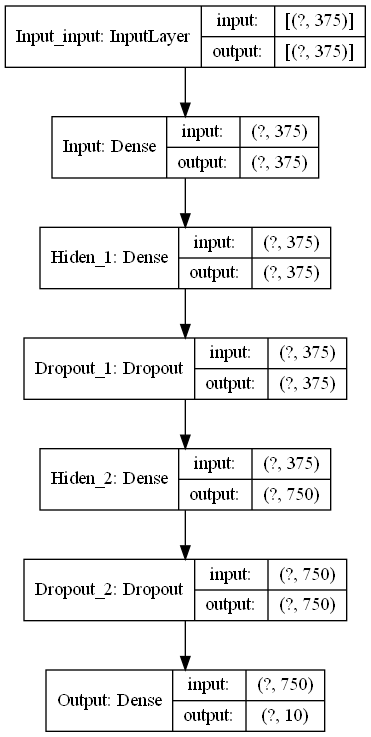

In [77]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_ANN' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 282,000 parameters is the result of 750 neurons with 375 features + 750 bias values
- 3,755   parameters is the result of 750 neurons with 5 features  + 5  bias values

In [78]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (288, 375)
y_train.........: (288,)
y_train_OHEV....: (288, 10)

Testing set

X_test..........: (32, 375)
y_test..........: (32,)
y_test_OHEV.....: (32, 10)

Validation set

X_val_norm......: (80, 375)
y_val...........: (80,)
y_OHEV_val......: (80, 10)


In [79]:
y_train_OHEV

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [80]:
batch_size_ANN = 20
epochs_ANN     = 350

history_ANN    = model_ANN.fit(X_train, y_train_OHEV,
                               batch_size      = batch_size_ANN,
                               epochs          = epochs_ANN,
                               verbose         = 1,
                               validation_data = (X_test, y_test_OHEV),
                               callbacks       = callbacks_list)

Epoch 1/350
 1/15 [=>............................] - ETA: 0s - loss: 2.3445 - accuracy: 0.1000
Epoch 00001: val_accuracy improved from -inf to 0.37500, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\ESC-10_saved_models\Model_ANN_weights_0_best_norm_original.hdf5
15/15 [==============================] - 0s 16ms/step - loss: 2.2954 - accuracy: 0.1076 - val_loss: 2.2406 - val_accuracy: 0.3750
Epoch 2/350
 1/15 [=>............................] - ETA: 0s - loss: 2.2117 - accuracy: 0.3500
Epoch 00002: val_accuracy improved from 0.37500 to 0.43750, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\ESC-10_saved_models\Model_ANN_weights_0_best_norm_original.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 2.2184 - accuracy: 0.2326 - val_loss: 2.1627 - val_accuracy: 0.4375
Epoch 3/350
 1/15 [=>............................] - ETA: 0s - loss: 2.1440 - accuracy: 0.2500
Epoch 00003: val_accuracy improved from 0.43750 to 0.46875,

 1/15 [=>............................] - ETA: 0s - loss: 0.5515 - accuracy: 0.8000
Epoch 00025: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8993 - val_loss: 0.5421 - val_accuracy: 0.8750
Epoch 26/350
 1/15 [=>............................] - ETA: 0s - loss: 0.3160 - accuracy: 1.0000
Epoch 00026: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.9028 - val_loss: 0.5051 - val_accuracy: 0.8438
Epoch 27/350
 1/15 [=>............................] - ETA: 0s - loss: 0.3013 - accuracy: 0.9500
Epoch 00027: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.9306 - val_loss: 0.5100 - val_accuracy: 0.9062
Epoch 28/350
 1/15 [=>............................] - ETA: 0s - loss: 0.6594 - accuracy: 0.8000
Epoch 00028: val_accuracy did not improve from 0.90625
15/15 [===============

Epoch 54/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0512 - accuracy: 1.0000
Epoch 00054: val_accuracy did not improve from 0.93750
15/15 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9792 - val_loss: 0.4312 - val_accuracy: 0.8438
Epoch 55/350
 1/15 [=>............................] - ETA: 0s - loss: 0.1577 - accuracy: 0.9500
Epoch 00055: val_accuracy did not improve from 0.93750
15/15 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9722 - val_loss: 0.3659 - val_accuracy: 0.8750
Epoch 56/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0938 - accuracy: 1.0000
Epoch 00056: val_accuracy did not improve from 0.93750
15/15 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9757 - val_loss: 0.3893 - val_accuracy: 0.8750
Epoch 57/350
 1/15 [=>............................] - ETA: 0s - loss: 0.1365 - accuracy: 1.0000
Epoch 00057: val_accuracy did not improve from 0.93750
15/15 [==

Epoch 83/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0226 - accuracy: 1.0000
Epoch 00083: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9965 - val_loss: 0.3839 - val_accuracy: 0.8750
Epoch 84/350
 1/15 [=>............................] - ETA: 0s - loss: 0.1074 - accuracy: 0.9500
Epoch 00084: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9896 - val_loss: 0.3885 - val_accuracy: 0.9375
Epoch 85/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0858 - accuracy: 1.0000
Epoch 00085: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.9826 - val_loss: 0.4070 - val_accuracy: 0.8750
Epoch 86/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0542 - accuracy: 1.0000
Epoch 00086: val_accuracy did not improve from 0.96875
15/15 [==

 1/15 [=>............................] - ETA: 0s - loss: 0.0524 - accuracy: 1.0000
Epoch 00112: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.9965 - val_loss: 0.3734 - val_accuracy: 0.9375
Epoch 113/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 00113: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9896 - val_loss: 0.3795 - val_accuracy: 0.9062
Epoch 114/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0236 - accuracy: 1.0000
Epoch 00114: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9965 - val_loss: 0.3892 - val_accuracy: 0.8750
Epoch 115/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0216 - accuracy: 1.0000
Epoch 00115: val_accuracy did not improve from 0.96875
15/15 [============

 1/15 [=>............................] - ETA: 0s - loss: 0.0466 - accuracy: 1.0000
Epoch 00141: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9965 - val_loss: 0.3740 - val_accuracy: 0.9062
Epoch 142/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 00142: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.3892 - val_accuracy: 0.9062
Epoch 143/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0588 - accuracy: 1.0000
Epoch 00143: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.9375
Epoch 144/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 00144: val_accuracy did not improve from 0.96875
15/15 [============

 1/15 [=>............................] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 00170: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.3663 - val_accuracy: 0.9375
Epoch 171/350
 1/15 [=>............................] - ETA: 0s - loss: 8.8428e-04 - accuracy: 1.0000
Epoch 00171: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3675 - val_accuracy: 0.9062
Epoch 172/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 00172: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.3830 - val_accuracy: 0.9375
Epoch 173/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 00173: val_accuracy did not improve from 0.96875
15/15 [========

 1/15 [=>............................] - ETA: 0s - loss: 8.6958e-04 - accuracy: 1.0000
Epoch 00199: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9375
Epoch 200/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 00200: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9375
Epoch 201/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 00201: val_accuracy did not improve from 0.96875
15/15 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3821 - val_accuracy: 0.9375
Epoch 202/350
 1/15 [=>............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 00202: val_accuracy did not improve from 0.96875
15/15 [========

In [81]:
score_ANN = model_ANN.evaluate(X_test, y_test_OHEV, verbose=0, batch_size = 20)
print('Test loss:', score_ANN[0])
print('Test accuracy:', score_ANN[1])

Test loss: 0.35771581530570984
Test accuracy: 0.96875


In [82]:
score_ANN[1]

0.96875

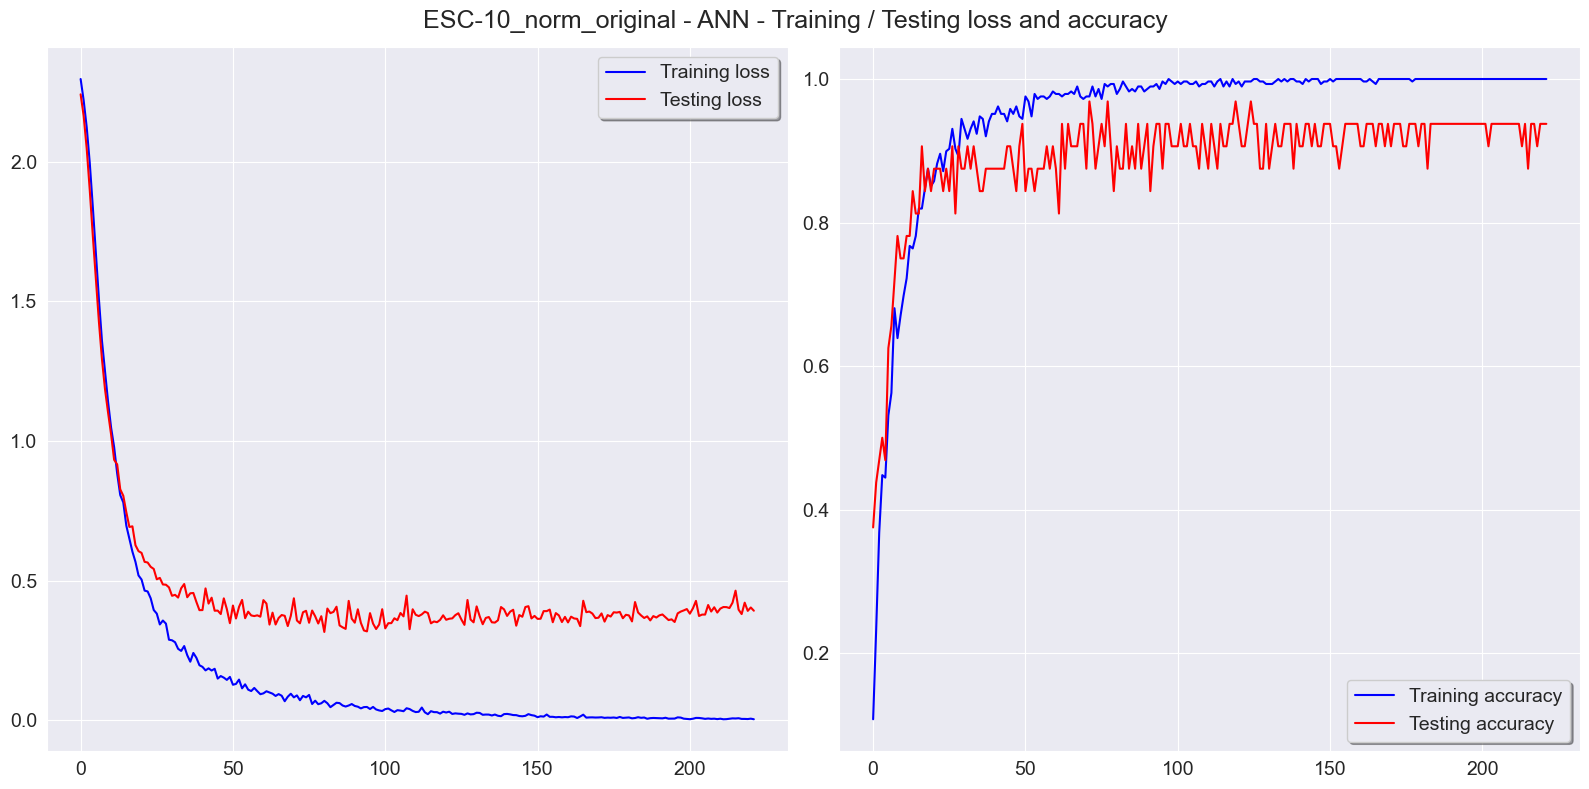

In [83]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - ANN - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_ANN.history['loss'], color='b', label="Training loss")
ax[0].plot(history_ANN.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_ANN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_ANN.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [84]:
# save model and architecture to single file (not the best model though)

#model_ANN.save(path_models + "Model_ANN.h5")
#print("Saved model to disk")

In [85]:
y_pred_ANN = np.argmax(model_ANN.predict(X_val_norm),axis=1)
y_pred_ANN

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 8, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 5, 2, 2, 6, 2, 6, 6, 6, 6,
       0, 3, 6, 6, 7, 7, 7, 7, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       8, 8, 8, 8, 8, 8, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int64)

In [86]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8,
       8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [87]:
metrics_set_ANN = classification_report(y_test_enc, y_pred_ANN, target_names=nom_classes)
print(metrics_set_ANN)

                precision    recall  f1-score   support

      Baby cry       0.88      0.88      0.88         8
      Chainsaw       0.80      1.00      0.89         8
    Clock tick       0.83      0.62      0.71         8
      Dog bark       0.80      1.00      0.89         8
Fire crackling       1.00      0.88      0.93         8
    Helicopter       0.67      0.50      0.57         8
 Person sneeze       0.86      0.75      0.80         8
          Rain       0.64      0.88      0.74         8
       Rooster       0.86      0.75      0.80         8
     Sea waves       1.00      1.00      1.00         8

      accuracy                           0.82        80
     macro avg       0.83      0.82      0.82        80
  weighted avg       0.83      0.82      0.82        80



In [89]:
# Load the model with the highest accuracy

model_ANN_saved = load_model(os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_ANN_saved.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                7510      
Total params: 571,510
Trainable params: 571,510
Non-trainable params: 0
_______________________________________________________

In [90]:
score_ANN_saved = model_ANN_saved.evaluate(X_val_norm, y_OHEV_val, verbose=1, batch_size = 20)
print('Test loss:', score_ANN_saved[0])
print('Test accuracy:', score_ANN_saved[1])

4/4 [==============================] - 0s 6ms/step - loss: 1.1051 - accuracy: 0.8250
Test loss: 1.1051017045974731
Test accuracy: 0.824999988079071


In [91]:
y_pred_ANN_saved = np.argmax(model_ANN_saved.predict(X_val_norm),axis=1)
y_pred_ANN_saved

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 8, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 5, 2, 2, 6, 2, 6, 6, 6, 6,
       0, 3, 6, 6, 7, 7, 7, 7, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       8, 8, 8, 8, 8, 8, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int64)

In [92]:
metrics_set_ANN_saved = classification_report(y_test_enc, y_pred_ANN_saved, target_names=nom_classes)
print(metrics_set_ANN_saved)

                precision    recall  f1-score   support

      Baby cry       0.88      0.88      0.88         8
      Chainsaw       0.80      1.00      0.89         8
    Clock tick       0.83      0.62      0.71         8
      Dog bark       0.80      1.00      0.89         8
Fire crackling       1.00      0.88      0.93         8
    Helicopter       0.67      0.50      0.57         8
 Person sneeze       0.86      0.75      0.80         8
          Rain       0.64      0.88      0.74         8
       Rooster       0.86      0.75      0.80         8
     Sea waves       1.00      1.00      1.00         8

      accuracy                           0.82        80
     macro avg       0.83      0.82      0.82        80
  weighted avg       0.83      0.82      0.82        80



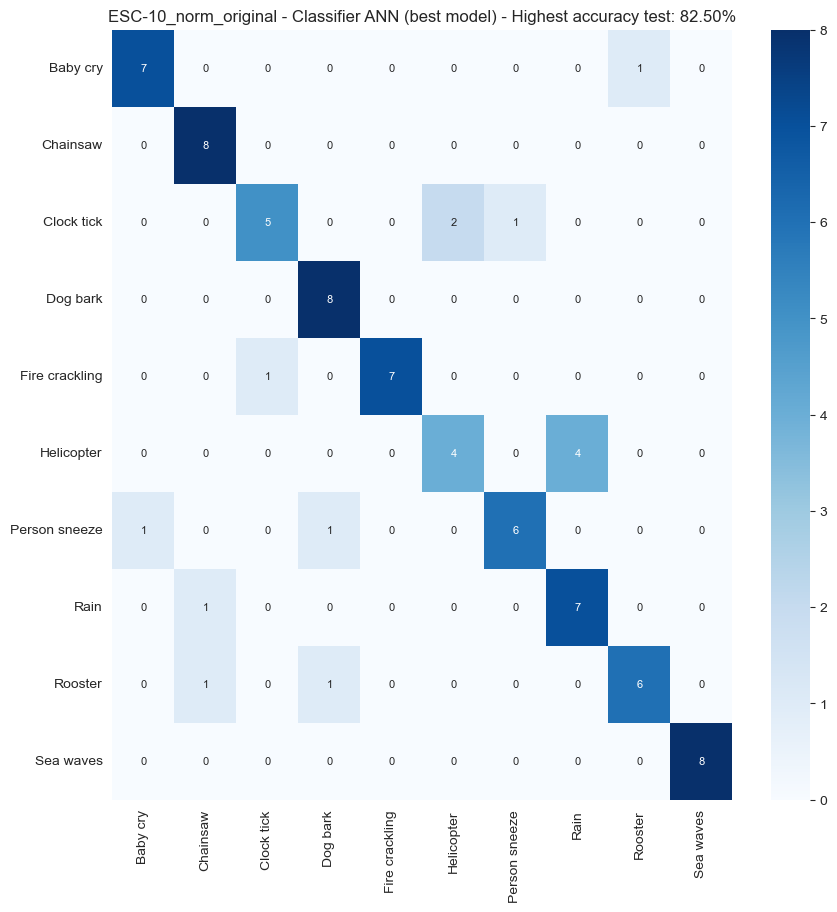

In [93]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_ANN_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier ANN (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_ANN_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

In [94]:
model_ANN_saved.layers

In [95]:
for layer in model_ANN_saved.layers:
    print(layer.get_weights())

[array([[ 0.00881883,  0.0973872 ,  0.04615057, ..., -0.01527033,
         0.03367151,  0.02169798],
       [-0.06807594,  0.03003174, -0.05382581, ..., -0.08004979,
         0.05132383,  0.02653704],
       [-0.04888797,  0.04323872,  0.02976652, ...,  0.0403447 ,
        -0.03386628,  0.08500514],
       ...,
       [-0.04486874,  0.00492019,  0.07288031, ...,  0.03149001,
        -0.0382761 , -0.00141851],
       [ 0.02611463, -0.04631662, -0.06396655, ..., -0.01824422,
         0.00310108,  0.04959346],
       [-0.05483415, -0.02314753, -0.00498966, ..., -0.08427572,
         0.00782909, -0.0586278 ]], dtype=float32), array([ 3.6100526e-03,  4.2485008e-03,  3.2689951e-03,  2.4752566e-03,
        5.0120112e-03,  1.3011816e-03,  3.5972393e-04,  1.3561497e-03,
        5.7859854e-03,  4.9675866e-03,  0.0000000e+00,  1.8198349e-03,
        2.9414871e-03,  6.1069317e-03, -2.3737357e-03,  5.4563745e-03,
        5.3800070e-03,  1.2703148e-03, -4.5442014e-04,  2.4777830e-03,
        0.00000

In [96]:
weights = model_ANN_saved.get_layer('Output').get_weights()
weights[1]

array([-1.1878043e-03, -6.9991336e-05, -7.9453143e-04,  1.7265975e-03,
        8.7478769e-04,  9.1719872e-04, -9.6095540e-04, -6.6523819e-04,
       -3.8136570e-03,  3.3775589e-03], dtype=float32)

In [97]:
# del model_CNN_1D

### CNN 1D

In [98]:
# CNN (Convolutional Neural Network) using Tensorflow

def build_CNN_1D_model(model_name: str, neurons: int):
    
    model = Sequential(name = model_name)

    # 1st conv layer
    model.add(Conv1D(28, 7, activation = 'relu', input_shape = (neurons, 1), name = 'Conv1D_1'))
    #model.add(MaxPooling1D(3, name = 'MaxPool1D_1'))

    # 2nd conv layer
    model.add(Conv1D(34, 5, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_2'))
    #model.add(MaxPooling1D(2, name = 'MaxPool1D_2'))
    
    # 3nd conv layer 
    model.add(Conv1D(56, 3, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_3'))
    model.add(MaxPooling1D(2, name = 'MaxPool1D_3'))
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # 4nd conv layer + dropout 20%
    model.add(Flatten())
    model.add(Dense(50, name = 'Dense'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation = 'softmax', name = 'Output'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

    return model

In [99]:
monitor = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(os.path.join(path_base, path.split("\\")[-2]))
    
filepath       = os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, monitor]

In [100]:
model_CNN_1D = build_CNN_1D_model('CNN_1D', neurons = n_dim)
model_CNN_1D.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

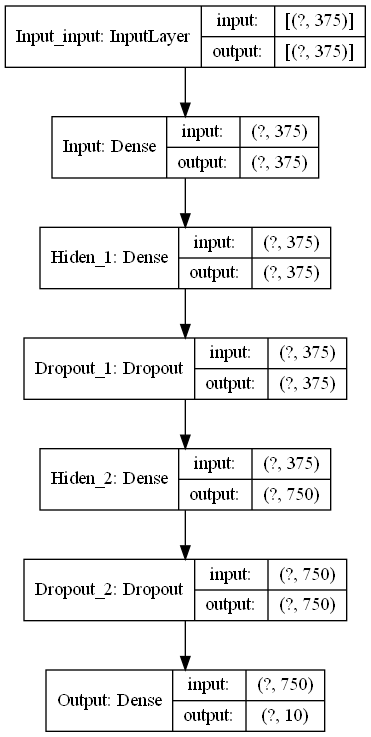

In [101]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_CNN_1D' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

1. For `Conv1D` layer:
   - The number of parameters for a `Conv1D` layer is calculated as `(kernel_size * input_channels + 1) * output_channels`, where `kernel_size` is the size of the convolutional kernel, `input_channels` is the number of input channels (1 in this case), and `output_channels` is the number of output channels.

2. For `Dense` layer:
   - The number of parameters for a `Dense` layer is calculated as `(input_units + 1) * output_units`, where `input_units` is the number of input units and `output_units` is the number of output units.
   
3. In the calculation of parameters for a convolutional layer, the term "channels" refers to the number of filters used in that layer.

- 224   parameters is the result of 28 filters * (7 kernels * 1 filter + 1)
- 4,794 parameters is the result of 34 filter * (5 kernels * 28 filters + 1)
- 5,768  parameters is the result of 56 filters * (3 kernels * 34 filters + 1)
- 515,250  parameters is the result of 50 neurons with 10,304 features + 50 bias values
- 255    parameters is the result of 5 neurons with 50 features + 5 bias values

In [102]:
batch_size_CNN_1D = 20
epochs_CNN_1D     = 150

history_CNN_1D    = model_CNN_1D.fit(X_train[..., np.newaxis], y_train_OHEV,
                                     batch_size      = batch_size_CNN_1D,
                                     epochs          = epochs_CNN_1D,
                                     verbose         = 1,
                                     validation_data =(X_test[..., np.newaxis], y_test_OHEV),
                                     callbacks       = callbacks_list)

Epoch 1/150
15/15 [==============================] - ETA: 0s - loss: 2.3357 - accuracy: 0.1493
Epoch 00001: val_accuracy improved from -inf to 0.18750, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\ESC-10_saved_models\Model_CNN_1D_weights_0_best_norm_original.hdf5
15/15 [==============================] - 0s 28ms/step - loss: 2.3357 - accuracy: 0.1493 - val_loss: 2.1785 - val_accuracy: 0.1875
Epoch 2/150
13/15 [=========================>....] - ETA: 0s - loss: 2.0246 - accuracy: 0.4808
Epoch 00002: val_accuracy improved from 0.18750 to 0.62500, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\ESC-10_saved_models\Model_CNN_1D_weights_0_best_norm_original.hdf5
15/15 [==============================] - 0s 8ms/step - loss: 1.9987 - accuracy: 0.4896 - val_loss: 1.7831 - val_accuracy: 0.6250
Epoch 3/150
12/15 [=======================>......] - ETA: 0s - loss: 1.5774 - accuracy: 0.5917
Epoch 00003: val_accuracy improved from 0.62500 to 0.

Epoch 28/150
15/15 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9722
Epoch 00028: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9722 - val_loss: 0.5370 - val_accuracy: 0.8438
Epoch 29/150
15/15 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9861
Epoch 00029: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 5ms/step - loss: 0.1170 - accuracy: 0.9861 - val_loss: 0.4873 - val_accuracy: 0.8438
Epoch 30/150
15/15 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9826
Epoch 00030: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 5ms/step - loss: 0.1183 - accuracy: 0.9826 - val_loss: 0.4941 - val_accuracy: 0.8438
Epoch 31/150
15/15 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9896
Epoch 00031: val_accuracy did not improve from 0.90625
15/15 [==

 1/15 [=>............................] - ETA: 0s - loss: 0.0713 - accuracy: 1.0000
Epoch 00057: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 1.0000 - val_loss: 0.5101 - val_accuracy: 0.8750
Epoch 58/150
 1/15 [=>............................] - ETA: 0s - loss: 0.0901 - accuracy: 1.0000
Epoch 00058: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.9965 - val_loss: 0.5306 - val_accuracy: 0.8438
Epoch 59/150
 1/15 [=>............................] - ETA: 0s - loss: 0.0714 - accuracy: 1.0000
Epoch 00059: val_accuracy did not improve from 0.90625
15/15 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 1.0000 - val_loss: 0.4362 - val_accuracy: 0.8438
Epoch 60/150
 1/15 [=>............................] - ETA: 0s - loss: 0.0786 - accuracy: 1.0000
Epoch 00060: val_accuracy did not improve from 0.90625
15/15 [===============

In [103]:
score_CNN_1D = model_CNN_1D.evaluate(X_test[..., np.newaxis], y_test_OHEV, verbose=0, batch_size = 20)
print('Test loss:', score_CNN_1D[0])
print('Test accuracy:', score_CNN_1D[1])

Test loss: 0.4518452286720276
Test accuracy: 0.90625


In [104]:
score_CNN_1D[1]

0.90625

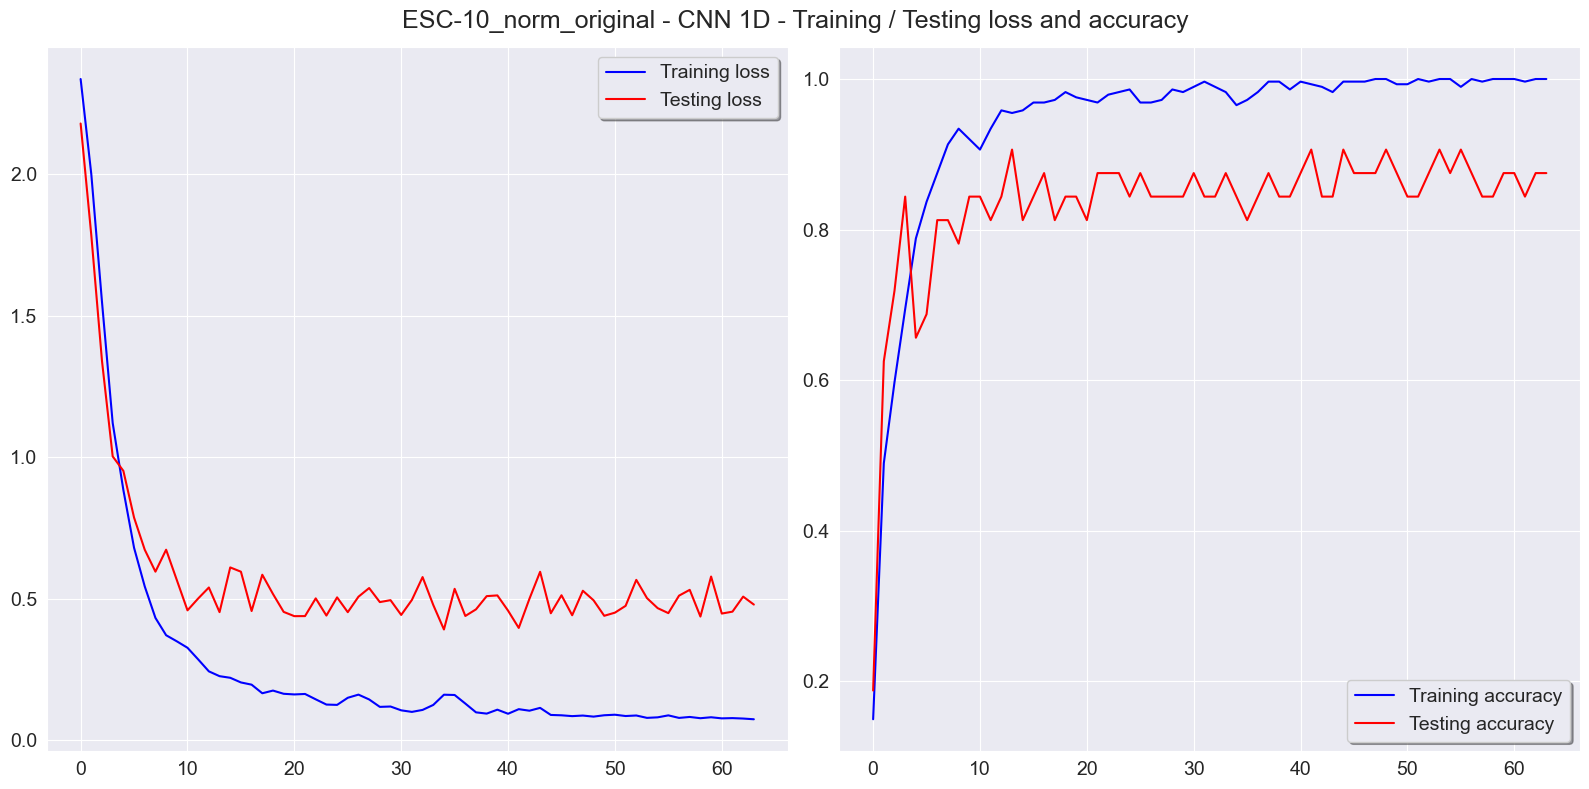

In [105]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - CNN 1D - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_CNN_1D.history['loss'], color='b', label="Training loss")
ax[0].plot(history_CNN_1D.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_CNN_1D.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_CNN_1D.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [106]:
# save model and architecture to single file (Not the best model though)

#model_CNN_1D.save(path_models + "Model_CNN_1D.h5")
#print("Saved model to disk")

In [107]:
y_pred_CNN_1D = np.argmax(model_CNN_1D.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 0, 0, 3, 0, 0, 6, 0, 0, 2, 2, 2, 4, 2, 2, 6, 2, 6, 6, 6, 6,
       0, 3, 6, 6, 1, 1, 7, 7, 5, 9, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 8, 1,
       8, 8, 8, 0, 8, 8, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int64)

In [108]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8,
       8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [109]:
metrics_set_CNN_1D = classification_report(y_test_enc, y_pred_CNN_1D, target_names=nom_classes)
print(metrics_set_CNN_1D)

                precision    recall  f1-score   support

      Baby cry       0.75      0.75      0.75         8
      Chainsaw       0.64      0.88      0.74         8
    Clock tick       0.86      0.75      0.80         8
      Dog bark       0.80      1.00      0.89         8
Fire crackling       0.88      0.88      0.88         8
    Helicopter       0.75      0.38      0.50         8
 Person sneeze       0.75      0.75      0.75         8
          Rain       0.78      0.88      0.82         8
       Rooster       1.00      0.75      0.86         8
     Sea waves       0.89      1.00      0.94         8

      accuracy                           0.80        80
     macro avg       0.81      0.80      0.79        80
  weighted avg       0.81      0.80      0.79        80



In [110]:
# Load the model with the highest accuracy

model_CNN_1D_saved = load_model(os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_CNN_1D_saved.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

In [111]:
score_CNN_1D_saved = model_CNN_1D_saved.evaluate(X_val_norm[..., np.newaxis], y_OHEV_val, verbose=1, batch_size = 20)
print('Test loss:', score_CNN_1D_saved[0])
print('Test accuracy:', score_CNN_1D_saved[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.8000
Test loss: 0.9274995923042297
Test accuracy: 0.800000011920929


In [112]:
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D_saved

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9,
       9, 9, 0, 0, 3, 0, 0, 6, 0, 0, 2, 2, 2, 4, 2, 2, 6, 2, 6, 6, 6, 6,
       0, 3, 6, 6, 1, 1, 7, 7, 5, 9, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 8, 1,
       8, 8, 8, 0, 8, 8, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int64)

In [113]:
metrics_set_CNN_1D_saved = classification_report(y_test_enc, y_pred_CNN_1D_saved, target_names=nom_classes)
print(metrics_set_CNN_1D_saved)

                precision    recall  f1-score   support

      Baby cry       0.75      0.75      0.75         8
      Chainsaw       0.64      0.88      0.74         8
    Clock tick       0.86      0.75      0.80         8
      Dog bark       0.80      1.00      0.89         8
Fire crackling       0.88      0.88      0.88         8
    Helicopter       0.75      0.38      0.50         8
 Person sneeze       0.75      0.75      0.75         8
          Rain       0.78      0.88      0.82         8
       Rooster       1.00      0.75      0.86         8
     Sea waves       0.89      1.00      0.94         8

      accuracy                           0.80        80
     macro avg       0.81      0.80      0.79        80
  weighted avg       0.81      0.80      0.79        80



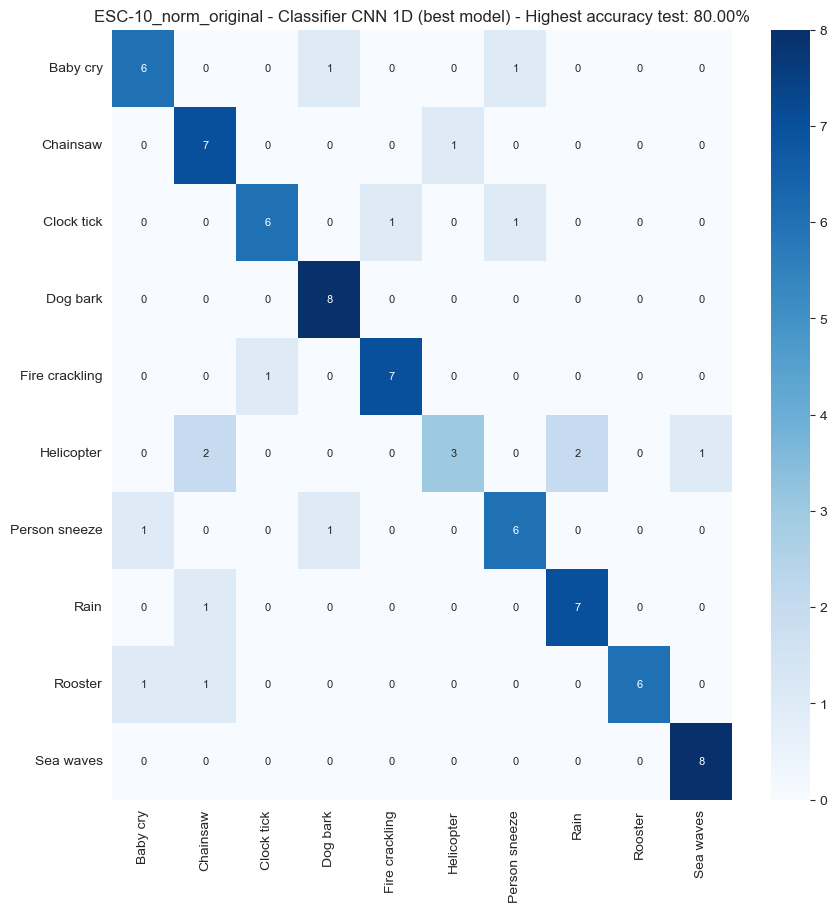

In [114]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_CNN_1D_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier CNN 1D (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_CNN_1D_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()


In [115]:
model_CNN_1D_saved.layers

In [116]:
for layer in model_CNN_1D_saved.layers:
    print(layer.get_weights())

[array([[[-0.1606792 , -0.06920293, -0.12742302, -0.00120298,
         -0.06262639,  0.18760046,  0.02178483,  0.01999443,
          0.16756943, -0.02926438, -0.08677316,  0.16575933,
          0.1881535 , -0.0726334 , -0.07068769,  0.16185974,
         -0.04402189,  0.09321049,  0.05971253,  0.03872875,
          0.13115542, -0.05289316,  0.15009862,  0.14426555,
         -0.11900227,  0.01786431,  0.05639517, -0.15245341]],

       [[ 0.19471754,  0.22380811, -0.18279032, -0.14342253,
          0.1829065 , -0.11129755,  0.05139383, -0.11742647,
         -0.13951889,  0.19342995,  0.1598117 , -0.17880562,
         -0.15796255,  0.03201178, -0.08221602, -0.0760973 ,
         -0.07494614,  0.12191378, -0.08513634,  0.09719478,
         -0.11447489, -0.11277734, -0.16169098, -0.09596255,
          0.16446695,  0.15625963,  0.07299471,  0.03274602]],

       [[ 0.14227395, -0.01857752, -0.09191246,  0.1546904 ,
         -0.01673081,  0.1746778 ,  0.15686275, -0.06239082,
          0.04063

In [117]:
weights = model_CNN_1D_saved.get_layer('Output').get_weights()
weights[1]

array([ 1.2084212e-03, -1.0712446e-04,  1.4166657e-03,  2.0775897e-03,
        4.9802079e-04, -2.5307282e-03, -5.3630350e-04, -2.2835266e-03,
        9.5439376e-04,  5.5737386e-05], dtype=float32)

## Metrics for the classifiers


1. Accuracy: Accuracy is a measure of how many correct predictions a model makes overall, i.e., the ratio of correct predictions to the total number of predictions. It's a commonly used metric for evaluating models, but it may not be suitable in certain situations.

2. Precision: Precision measures the ratio of true positives (correctly predicted positive instances) to all instances predicted as positive. It focuses on the accuracy of positive predictions.

3. Recall: Recall, also known as sensitivity or true positive rate, measures the ratio of true positives to all actual positive instances. It focuses on how well a model captures all the positive instances.

4. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives. The F1 score is especially useful when you want to strike a balance between precision and recall.


The F1 score is a metric that combines precision and recall, and it is particularly useful in situations where class imbalance or unequal misclassification costs are present. In such contexts, the F1 score can be more informative and meaningful than accuracy.

A context where considering the F1 score makes more sense than accuracy:

**Medical Diagnosis:**

Imagine you're developing a model to diagnose a rare disease, and only 5% of the population has this disease. In this case, you have a significant class imbalance, where the majority of cases are negative (non-disease) and only a small fraction are positive (disease). If you were to use accuracy as the evaluation metric, the model could achieve a high accuracy by simply predicting "negative" for every case, because it would be correct 95% of the time due to the class imbalance. However, this would be entirely useless for detecting the actual disease.

In this scenario, you'd be more interested in the F1 score. The F1 score considers both precision and recall, helping you find a balance between correctly identifying the disease (high recall) and not making too many false positive predictions (high precision). A high F1 score in this context indicates that your model is effective at correctly identifying the disease while minimizing false alarms.

In [118]:
classifiers = ['ANN', 'CNN_1D']

In [ ]:
# Pipeline to run the classifiers and their metrics

def model_classifiers(classifiers:list, 
                      dbAug: pd.DataFrame, 
                      dbVal: pd.DataFrame, 
                      scalerOpt: str, 
                      use_aug = False,
                      use_PCA = False):
    
    # Clear the session to start a new training
    K.clear_session()
 
    if use_aug:
        dbAug = dbAug
        dbVal = dbAug
    else:
        dbAug = dbVal
        dbVal = dbVal  

    es = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)
    
    count       = 1
    batch_size  = 20
    verbose     = True
    models      = []
    acc_set     = pd.DataFrame(index=None, columns=['Model',
                                                    'Fold',
                                                    'Accuracy(Train)',
                                                    'Accuracy(Val)',
                                                    'F1(Train)',
                                                    'F1(Val)', 
                                                    'Precision(Train)',
                                                    'Precision(Val)', 
                                                    'Recall(Train)',
                                                    'Recall(Val)', 
                                                    'Conf_M',
                                                    'Process_time',                                                     
                                                    'Class_report(Val)'])
    
    for fold in np.unique(dbAug['Fold']):
        print(f"Validation fold: {fold}")

        dbComplete_VAL = dbVal[dbVal['Fold'] == fold]
        dbComplete     = dbAug[dbAug['Fold'] != fold]

        X_val   = dbComplete_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y_val   = np.array(dbComplete_VAL.Class_OHEV.to_list())
        X_train = dbComplete.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y_train = np.array(dbComplete.Class_OHEV.to_list())
        
        neurons  = X_train.shape[1]
        
        if scalerOpt == "normalization":
            X_val_norm   = X_val.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
            X_val_norm   = X_val_norm.values
            X_train_norm = X_train.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
            print(X_train_norm.describe())
            X_train_norm = X_train_norm.values
            
        elif scalerOpt == "standardization":
            X_val_norm   = X_val.apply(lambda x: (x - x.mean()) / x.std())
            X_val_norm   = X_val_norm.values
            X_train_norm = X_train.apply(lambda x: (x - x.mean()) / x.std())
            print(X_train_norm.describe())
            X_train_norm = X_train_norm.values
        else:
            sys.exit() 
            
        if use_PCA:
            pcaT = PCA()
            pcaT.fit(X_train_norm)
            ratio = pcaT.explained_variance_ratio_

            T           = 0.98
            current_sum = 0
            countComp   = 0

            for element in ratio:
                current_sum += element
                countComp   += 1

                if current_sum >= T:
                    break

            # Print the result
            print("Sum of elements:", current_sum)
            print("Number of elements summed:", countComp)           

            pca          = PCA(n_components = countComp)
            X_train_norm = pca.fit_transform(X_train_norm)
            X_val_norm   = pca.transform(X_val_norm)
            neurons      = countComp
        
        X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_train_norm, y_train, test_size=0.1, random_state=42, stratify=y_train)

        # Store the categorical labels to be used in the confusion matrix
        list_counter_train = counter_test_array(y_train)
        labels             = list(list_counter_train)

        for i in tqdm(range(len(classifiers))):
            
            name         = classifiers[i]
            model_name   = ('Model_' + classifiers[i] + '_' + str(count))
            count        = count + 1
            
            if classifiers[i] == 'ANN':
                
                if not os.path.exists(path_models):
                    os.makedirs(os.path.join(path_base, path.split("\\")[-2]))

                filepath       = os.path.join(path_models + 'Model_ANN_weights_0.best.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint, es]
               
                model = build_ANN_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    

                model.fit(X_train_norm, 
                          y_train, 
                          batch_size      = batch_size, 
                          epochs          = 350, 
                          verbose         = verbose,                               
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)
                
                model = load_model(path_models + 'Model_ANN_weights_0.best.hdf5')
                print('Best model loaded')

            else:
                
                if not os.path.exists(path_models):
                    os.makedirs(os.path.join(path_base, path.split("\\")[-2]))

                filepath       = os.path.join(path_models + 'Model_CNN_1D_weights_0.best.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint]                

                X_train_norm = X_train_norm[..., np.newaxis]
                X_val_norm   = X_val_norm[..., np.newaxis]
                X_test_norm  = X_test_norm[..., np.newaxis]

                model = build_CNN_1D_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    
                
                model.fit(X_train_norm, 
                          y_train, 
                          batch_size = batch_size, 
                          epochs = 150, 
                          verbose = verbose,                          
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)

                model = load_model(path_models + 'Model_CNN_1D_weights_0.best.hdf5')
                print('Best model loaded')

            # Get the model predictions
            y_train_enc = np.argmax(y_train, axis=1)
            y_val_enc   = np.argmax(y_val, axis=1)

            y_train_predicted = np.argmax(model.predict(X_train_norm), axis=1)
            
            t_srt             = time.process_time_ns()
            y_val_predicted   = np.argmax(model.predict(X_val_norm), axis=1)
            t_end             = time.process_time_ns()
            proc_time         = ((t_end - t_srt) / 1000000)         
    
            # Compute the classifier metrics
            accuracy_train = metrics.accuracy_score(y_train_enc, y_train_predicted)
            accuracy_val   = metrics.accuracy_score(y_val_enc,  y_val_predicted)

            f1_Score_train = metrics.f1_score(y_train_enc, y_train_predicted, average = 'weighted')
            f1_Score_val   = metrics.f1_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            precision_score_train = metrics.precision_score(y_train_enc, y_train_predicted, average = 'weighted')
            precision_score_val   = metrics.precision_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            recall_score_train = metrics.recall_score(y_train_enc, y_train_predicted, average = 'weighted')
            recall_score_val   = metrics.recall_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            class_report_val = classification_report(y_val_enc, y_val_predicted, target_names = nom_classes)
            print(class_report_val)
            
            # Compute the confusion matrix
            CM = metrics.confusion_matrix(y_val_enc, y_val_predicted)
            y_val_enc       = []
            y_val_predicted = []

            # Store the name, test accuracy results and model
            models.append((name, accuracy_val, model))
            
            K.clear_session()
            del model
                    
            acc_set = pd.concat([acc_set, pd.DataFrame({'Model': [name],
                                                        'Fold': [fold],
                                                        'Accuracy(Train)': [accuracy_train],
                                                        'Accuracy(Val)': [accuracy_val],
                                                        'F1(Train)': [f1_Score_train],
                                                        'F1(Val)': [f1_Score_val],
                                                        'Precision(Train)': [precision_score_train],
                                                        'Precision(Val)': [precision_score_val],
                                                        'Recall(Train)': [recall_score_train],
                                                        'Recall(Val)': [recall_score_val],
                                                        'Conf_M': [CM],
                                                        'Process_time': [proc_time],
                                                        'Class_report(Val)': class_report_val})], ignore_index = True)
                   
    return acc_set, models, labels

In [ ]:
# Option for scalerOpt is either "normalization" or "standardization"

metrics_set, models_set, cm_labels = model_classifiers(classifiers, 
                                                       DB_aug_from_pkl, 
                                                       DB_ori_from_pkl, 
                                                       scalerOpt = 'standardization',
                                                       use_aug = True,
                                                       use_PCA = False)

In [ ]:
metrics_set

In [ ]:
metrics_set.loc[0:0]

In [ ]:
metrics_set.loc[0, 'Conf_M']

In [ ]:
# Sort by Model and Accuracy test. Reset the index.

metrics_set = metrics_set.sort_values(['Model', 'Accuracy(Val)'], ascending = [True, True]).reset_index()
metrics_set

In [ ]:
metrics_set.sort_values(by='Accuracy(Val)').style.background_gradient(cmap = cmap_cm)

In [ ]:
highest_accuracy = metrics_set.groupby('Model')['Accuracy(Val)'].max()
highest_accuracy

In [ ]:
# Creates a dictionary of each classifier and its data explanation

unique_models = []
results       = {}

for c in classifiers:
    unique_models.append(c)

for model in unique_models:
    result = metrics_set[metrics_set['Model'] == model].describe().round(4)
    results[model] = result

In [ ]:
results['ANN']

In [ ]:
results['CNN_1D']

In [ ]:
metrics_set_no_cm = metrics_set.drop('Conf_M', axis=1)
metrics_set_no_cm

In [ ]:
metrics_set_name       = nom_dataset + '_metrics_set.csv'
metrics_set_name_no_cm = nom_dataset + '_metrics_set_no_cm.csv'

In [ ]:
# Writes de results to a CSV file

metrics_set.to_csv(path_pic + metrics_set_name, sep='\t', encoding='utf-8')
metrics_set_no_cm.to_csv(path_pic + metrics_set_name_no_cm, sep=';', decimal=',',encoding='utf-8')

In [ ]:
idx = metrics_set.groupby('Model')['Accuracy(Val)'].idxmax()
conf_matrices = metrics_set.loc[idx, ['Model','Accuracy(Val)','Conf_M']]
conf_matrices.set_index('Model', inplace=True)
conf_matrices_dict = conf_matrices.to_dict('index')
conf_matrices_dict

In [ ]:
conf_matrices_dict['ANN']['Conf_M']

In [ ]:
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    print(idx)
    print(i)
    print(conf_matrices_dict[i]['Accuracy(Val)'])
    print(conf_matrices_dict[i]['Conf_M'])

In [ ]:
# Plot the confusion matrix for the highest accuracy test classifiers

plt.figure(figsize=(20,8))
plt.suptitle(nom_dataset + '- Confusion matrices of the best results for each classifier', fontsize = 16,  y=0.99)
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    title = 'Classifier '+ i + ' (Highest accuracy validation of the best models: ' + str("{:0.4f}".format(conf_matrices_dict[i]['Accuracy(Val)'])) +')'
    plt.subplot(1,2,idx)
    plot_confusion_matrix(conf_matrices_dict[i]['Conf_M'],  
                          nom_classes, 
                          title,
                          cmap = None,                          
                          normalize = False)
plt.tight_layout(pad=1.0)
plt.savefig(path_pic + '03_Neural_network_5.png')
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
box_plot = sns.boxplot(data=metrics_set, x="Model", y="Accuracy(Val)", showfliers = True)

medians = list(metrics_set.groupby(['Model'])['Accuracy(Val)'].median())
medians = [round(element, 2) for element in medians]

vertical_offset = metrics_set['Accuracy(Val)'].median()*0.001  # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')

## Results ESC-10

## Gridsearch with augmented dataset

* k_NN performs better with  p = 1 (Manhattan distance) as expected due the dissimilar properties of the features, however, standardization was less efective than normalization. PCA didn't improve the accuracy. The acurracy was more stable with the augmented dataset;
* CNN_1D had a better performance in the augmented dataset with standardization, but without PCA;
* For all the other classifiers, the augmented dataset with standardization + PCA with 98% of explained variance ration (around 190 principal components) and 375 features performed either better or second better with a marginal difference.	

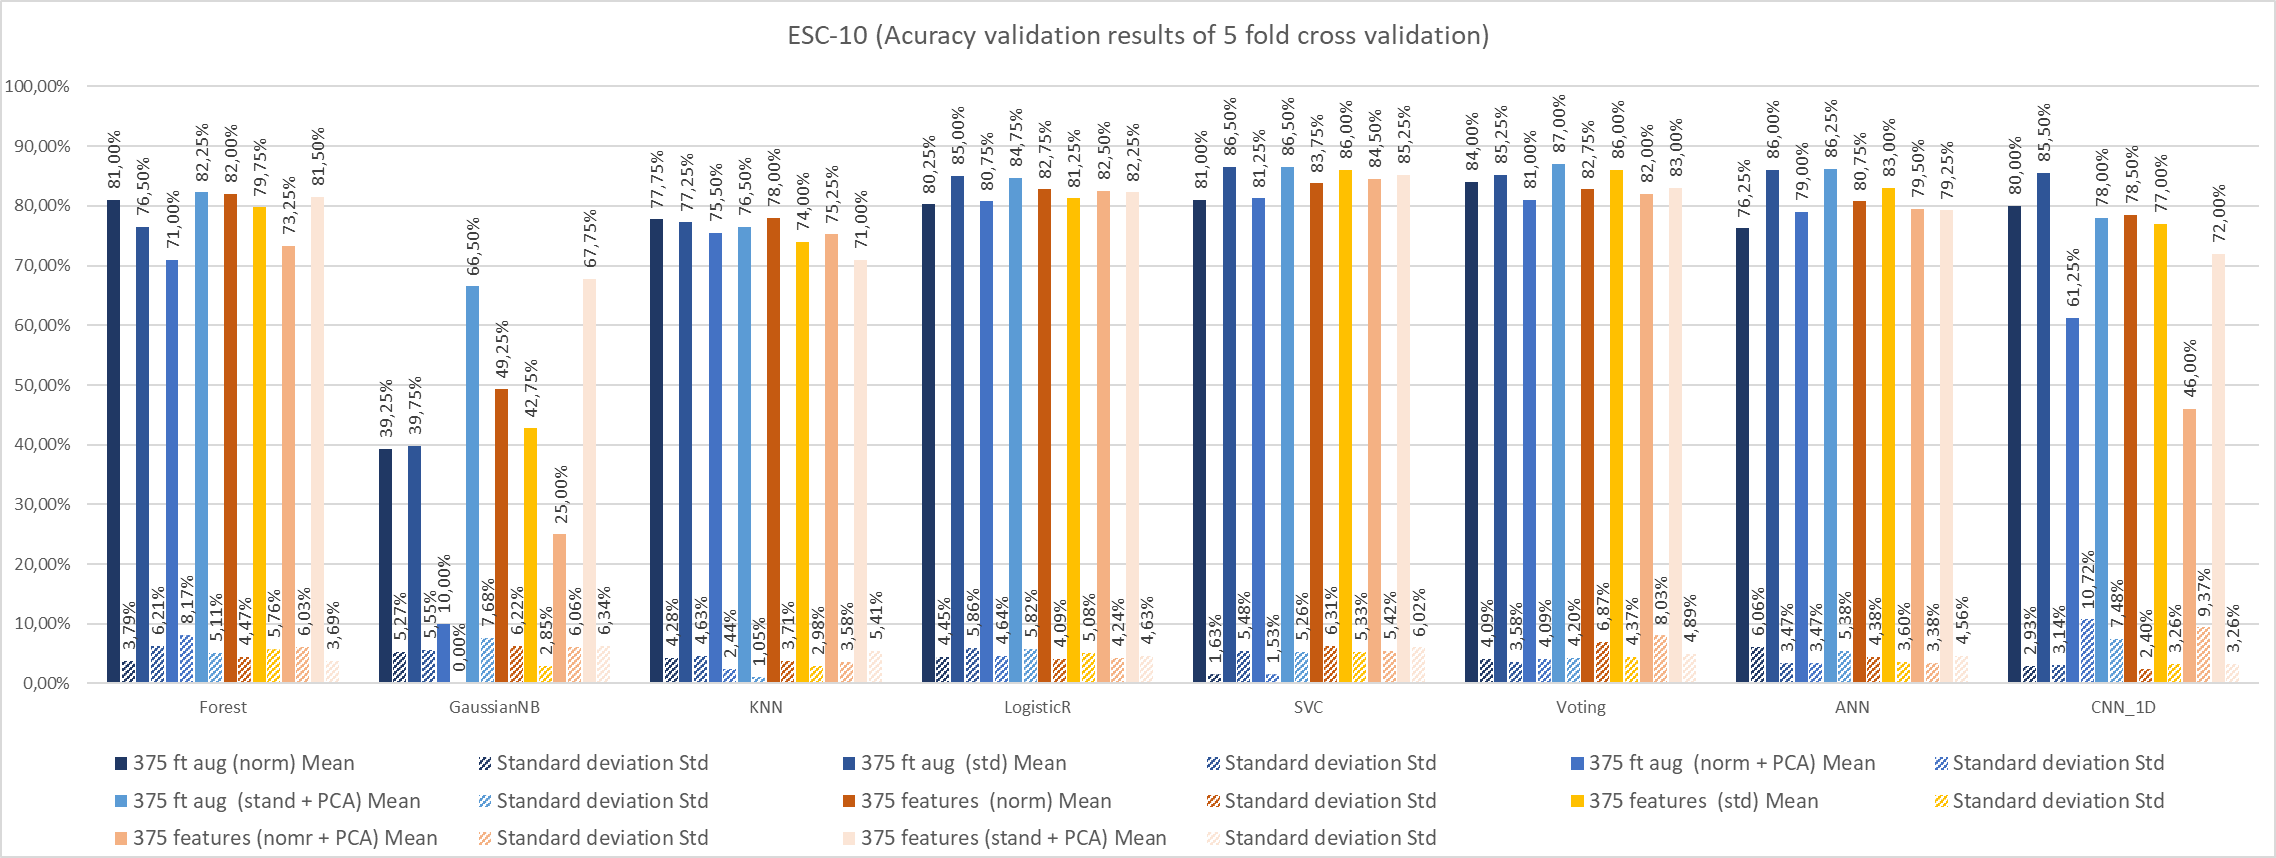

#### Accuracy validation for the augmented dataset standardized with PCA (375 features)

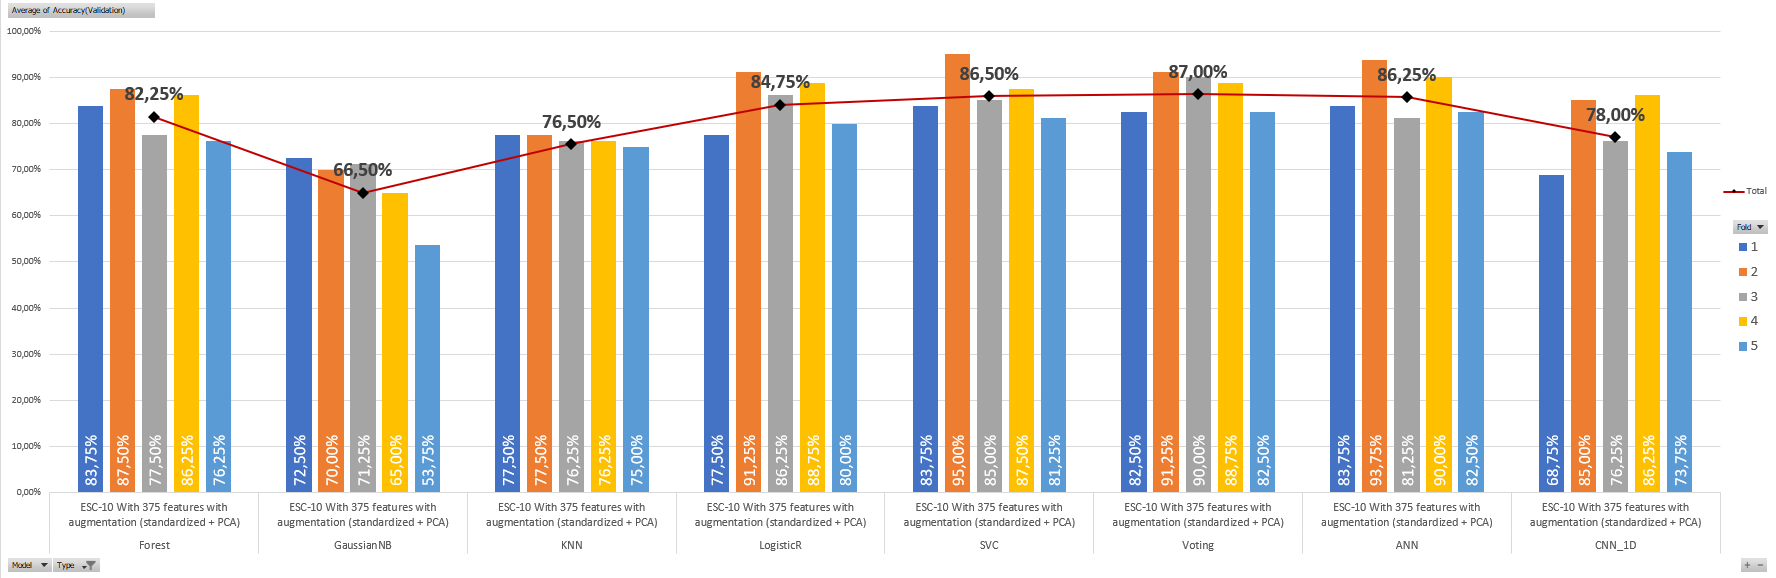

#### Accuracy validation for the augmented dataset standardized without PCA (375 features)

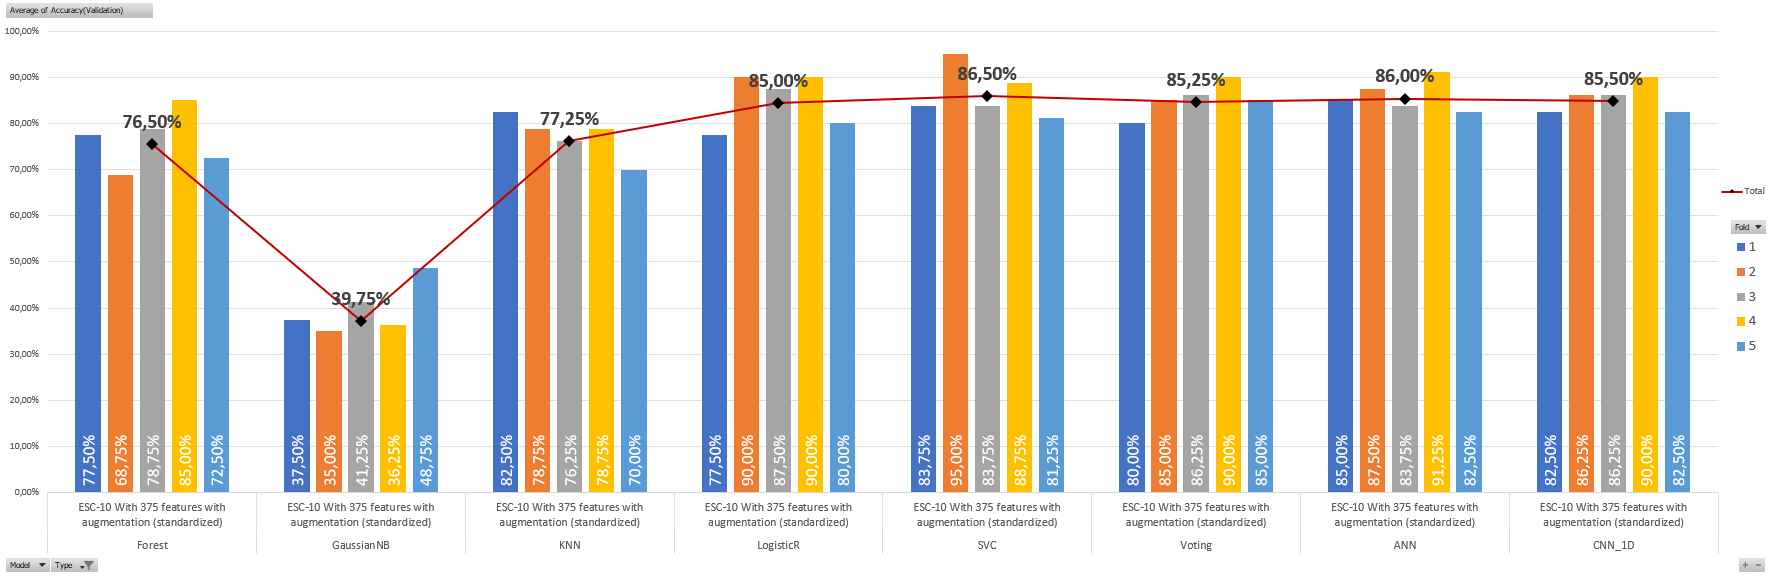

#### Comparison

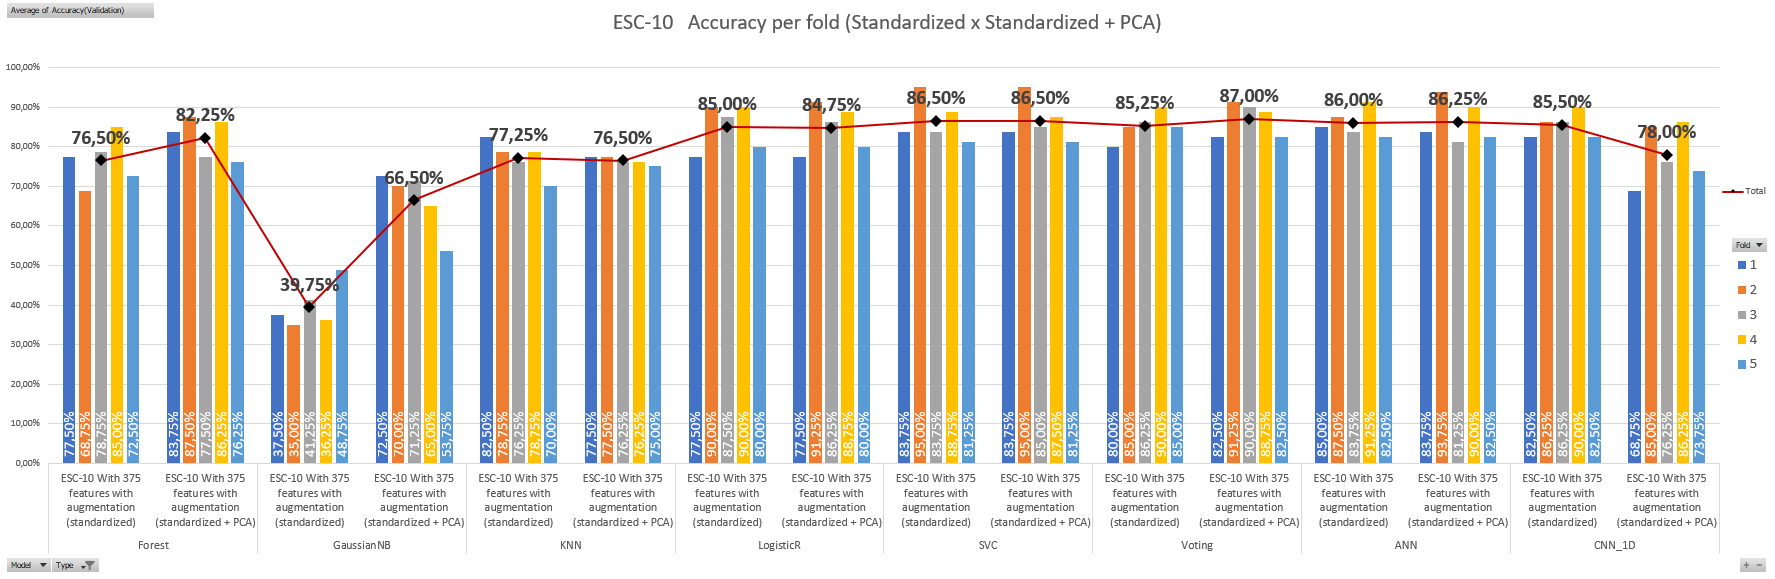


## Results BDLib2

## Gridsearch with augmented dataset

* Random forests and Naïve Bayes got a better performance with the augmented dataset with standardization + PCA with 98% of explained variance ration (around 130 principal components), however, the difference for Random Forests without PCA was marginal and the standard deviation was lower.
*  For all the other classifiers, the augmented dataset with standardization without PCA and 375 features performed better. With PCA was the second better with a marginal difference in the standard deviation, but it didn't performed well in the CNN 1D.

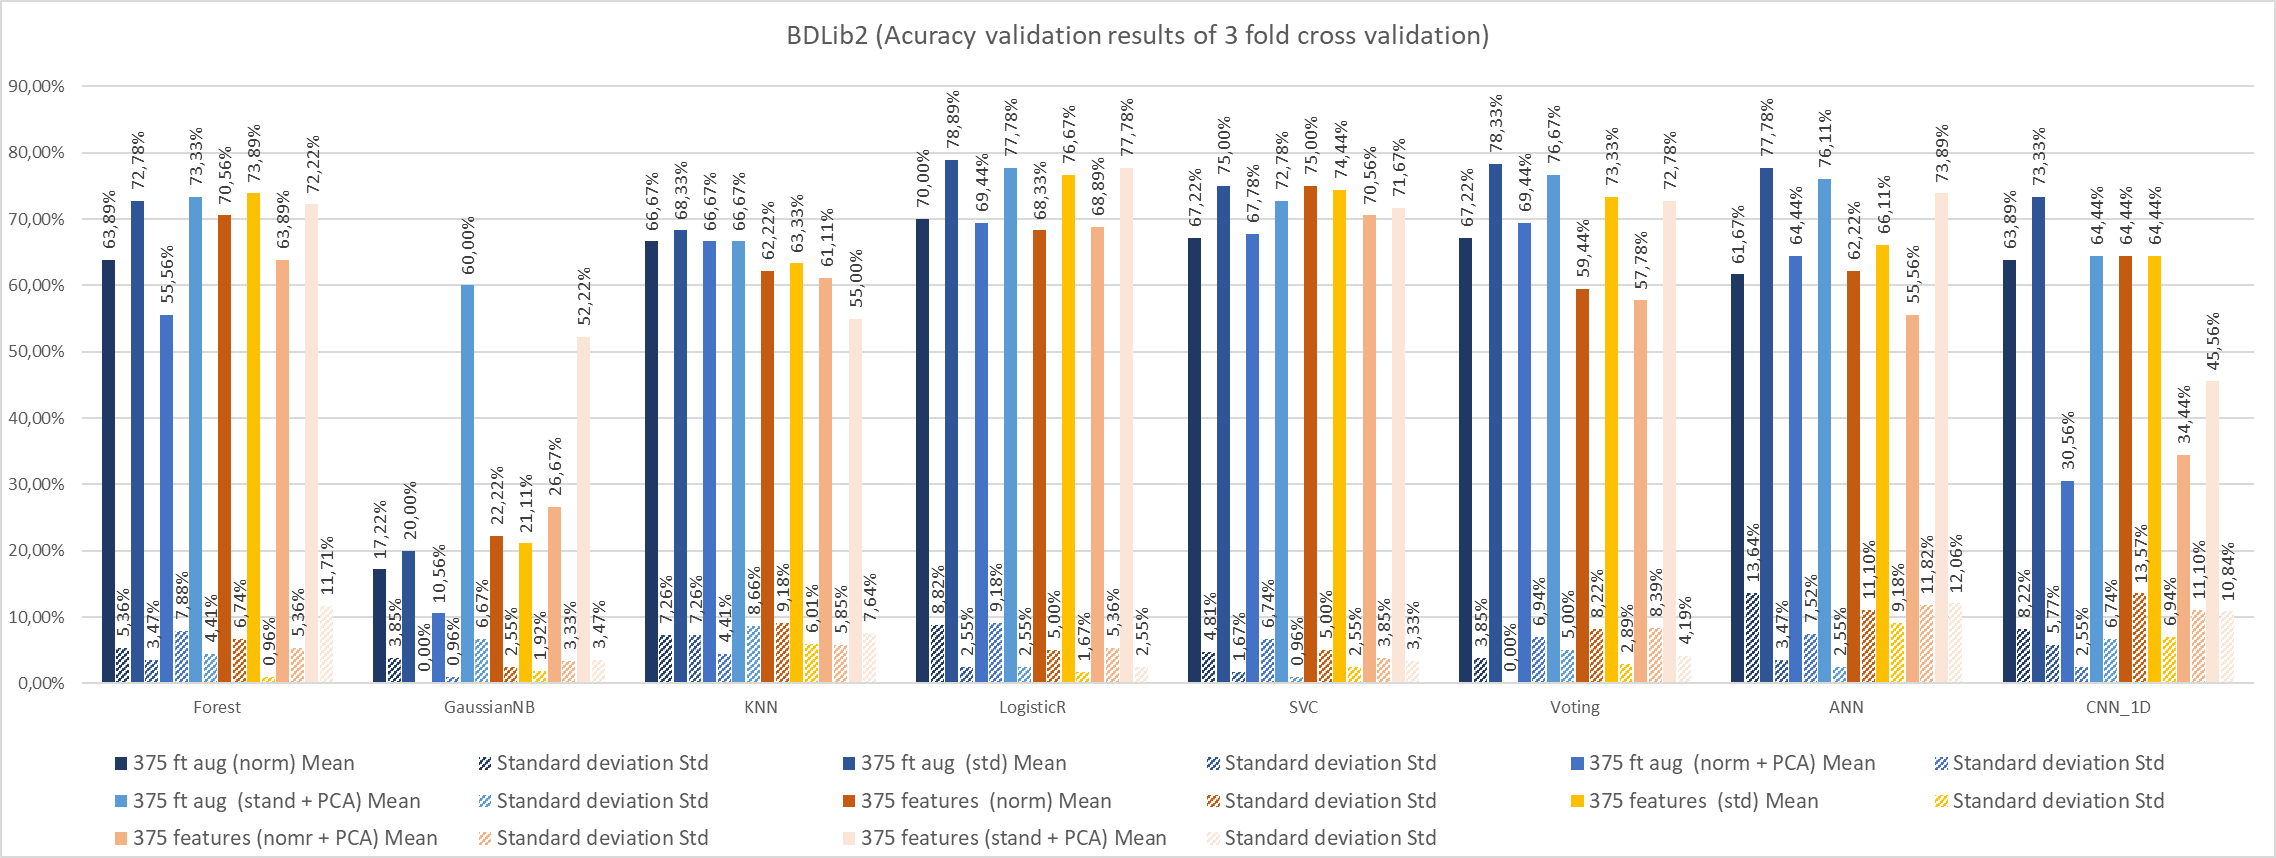

#### Accuracy validation for the augmented dataset standardized with PCA (375 features)

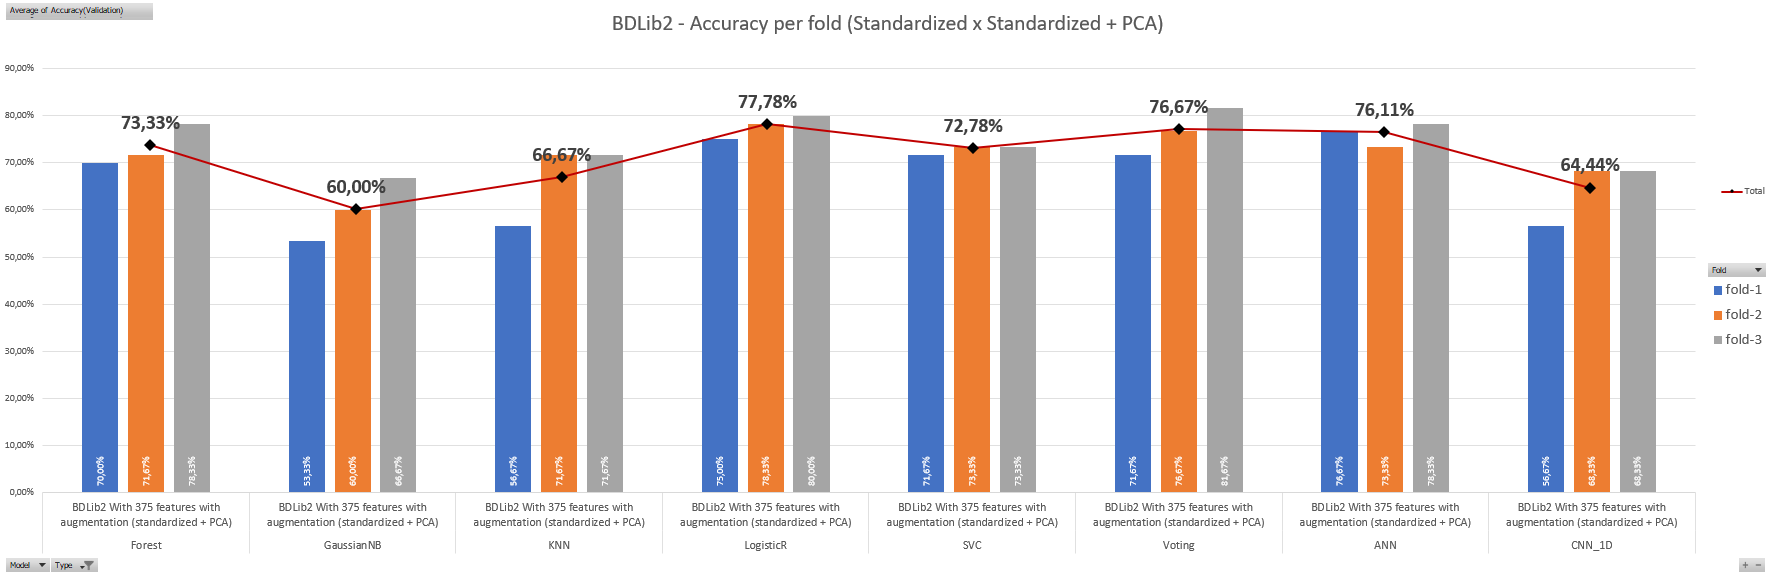

#### Accuracy validation for the augmented dataset standardized without PCA (375 features)

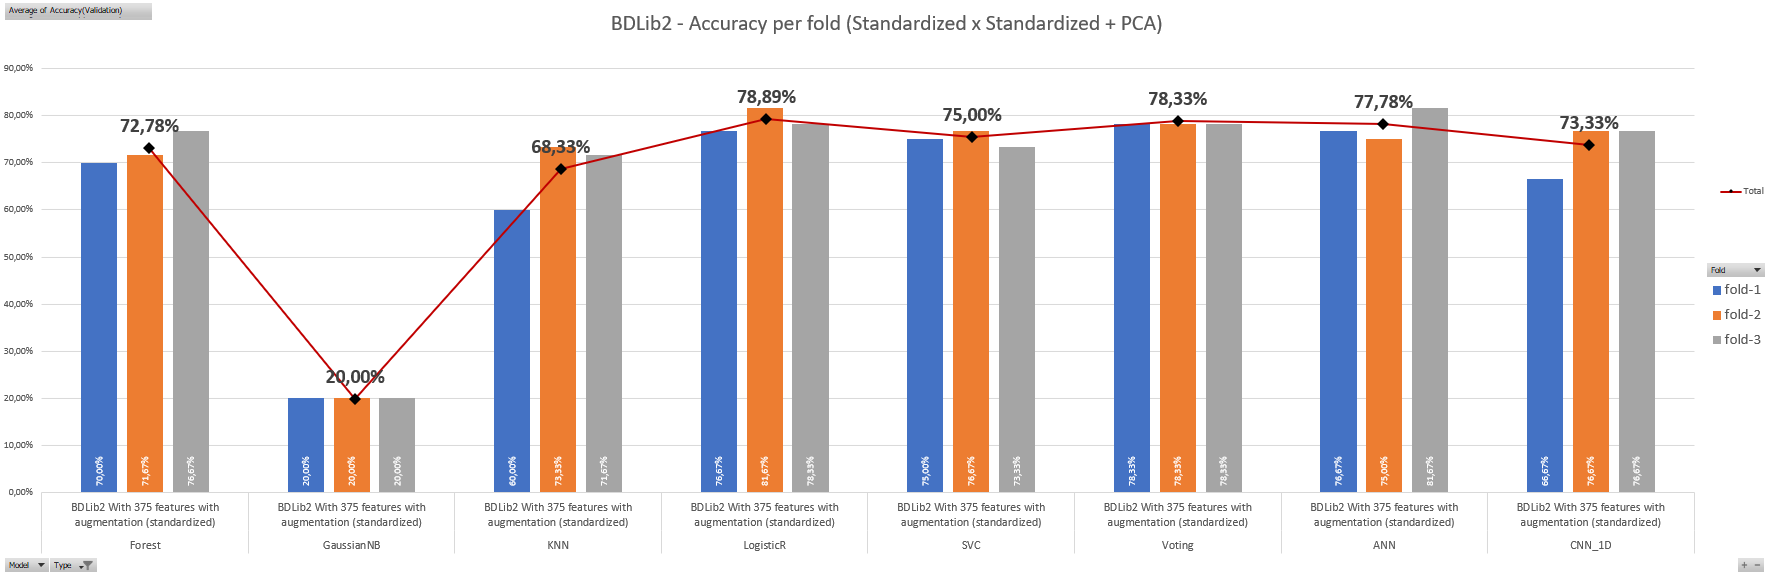

#### Comparison

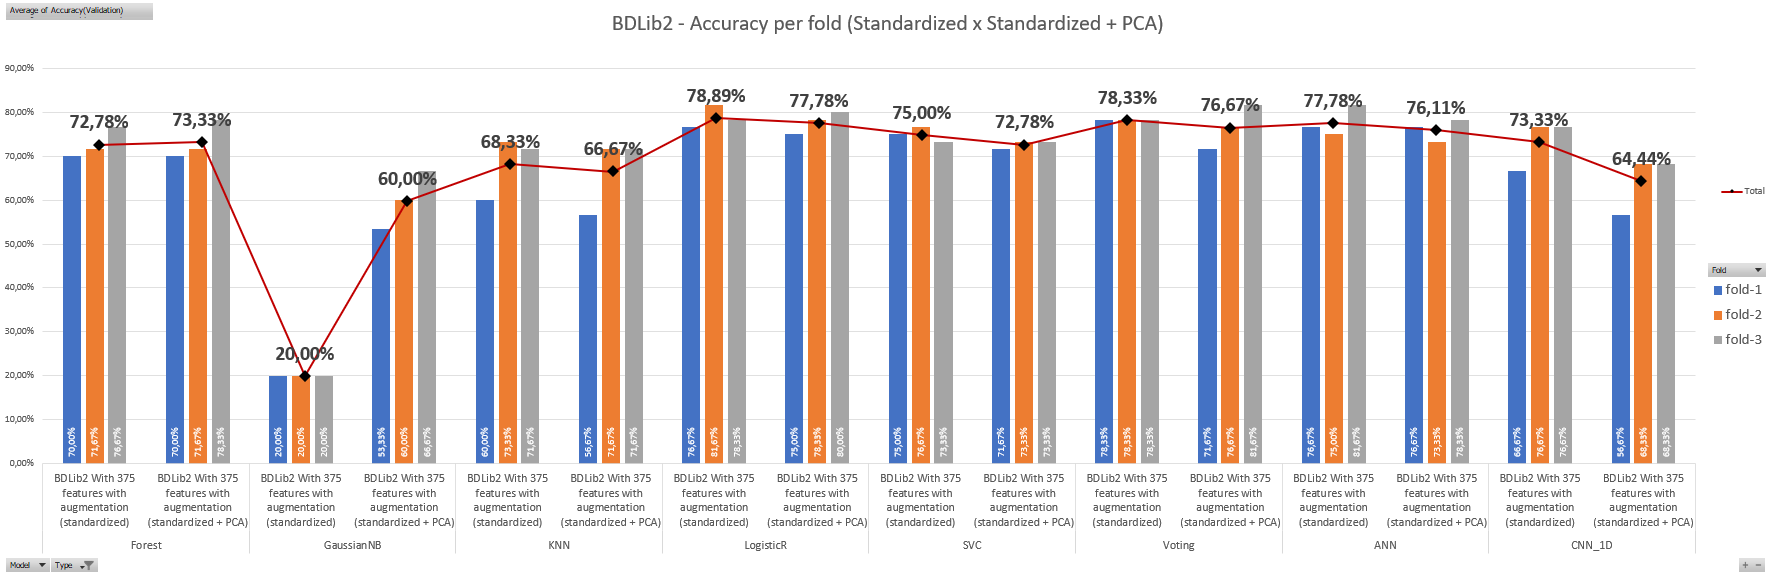


## Results UrbanSound8K

## Gridsearch with augmented dataset

* Random forests was the only classifier that presented a real benefit using standardized dataset with PCA.										
* The augmented models did not improve accuracy. This was an expected behaviour since this dataset already have a significant number of samples, summing around 8,75h.										
* For all the other classifiers, the original dataset (not augmented), stadardized, was very similar to model stadardized with PCA, except for the CNN 1D that was 5% lower. This finding may be useful for embedded application since the models will be lighter and faster.		

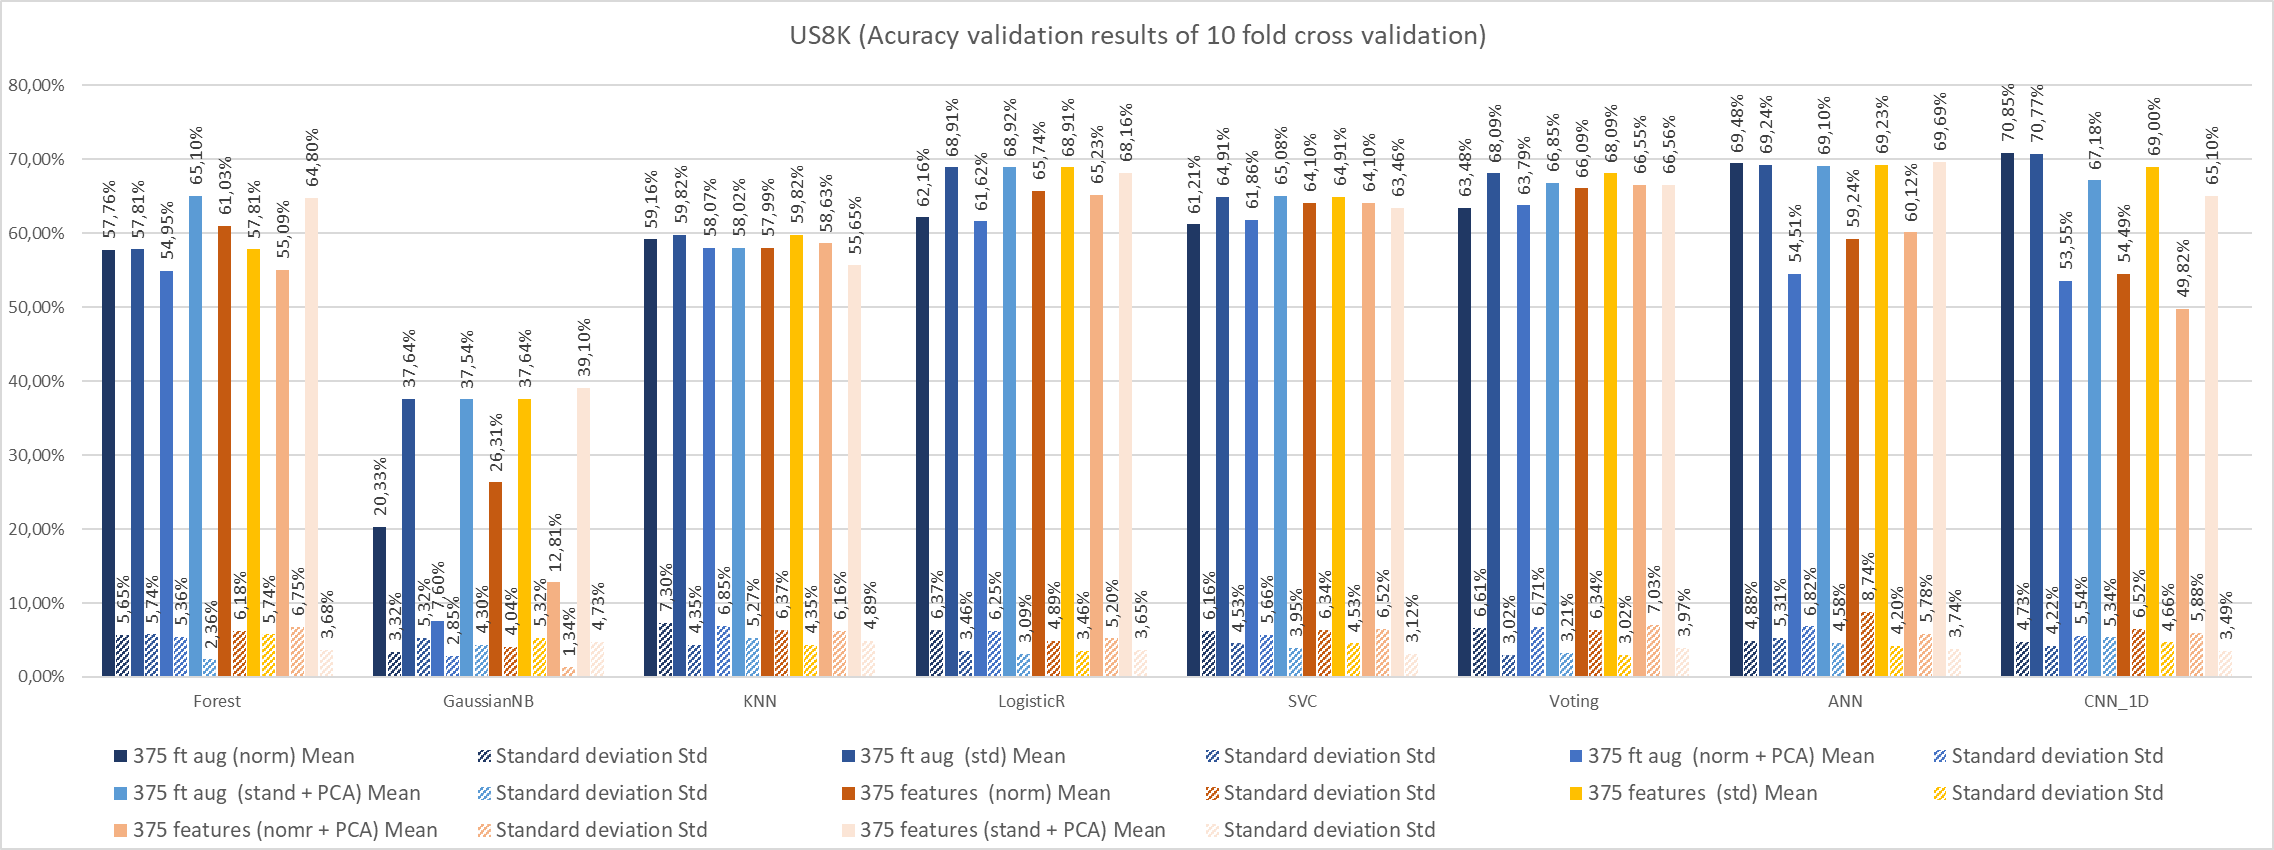

#### Accuracy validation for the augmented dataset standardized with PCA (375 features)

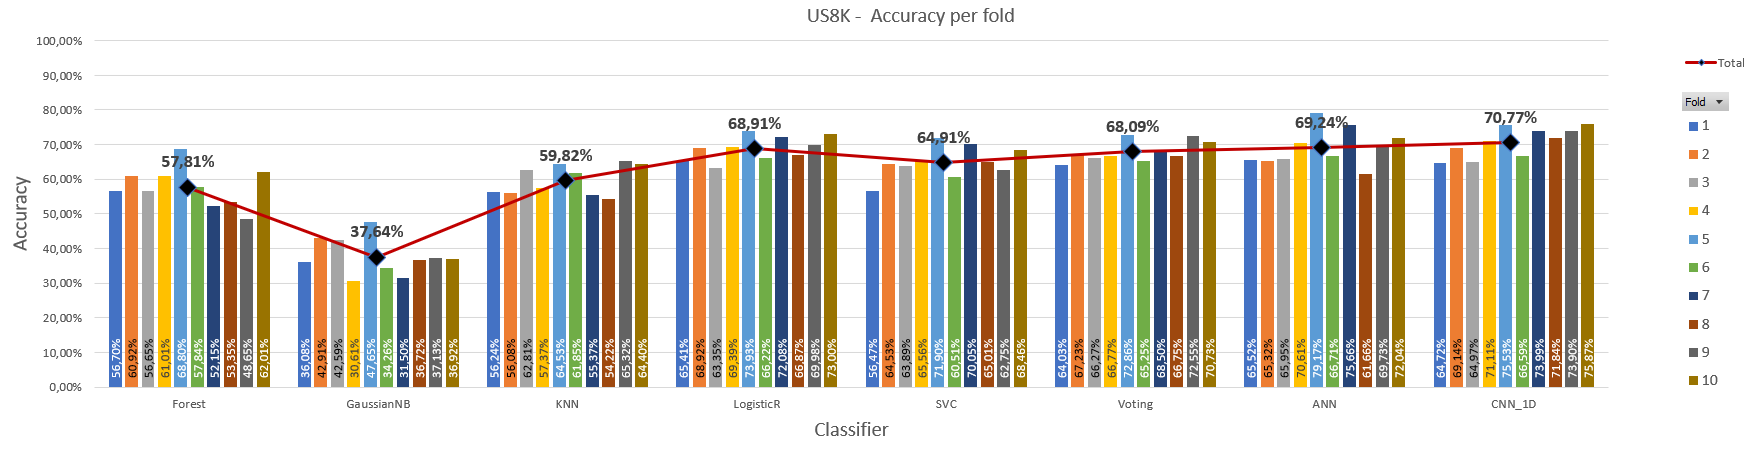

#### Accuracy validation for the augmented dataset standardized without PCA (375 features)

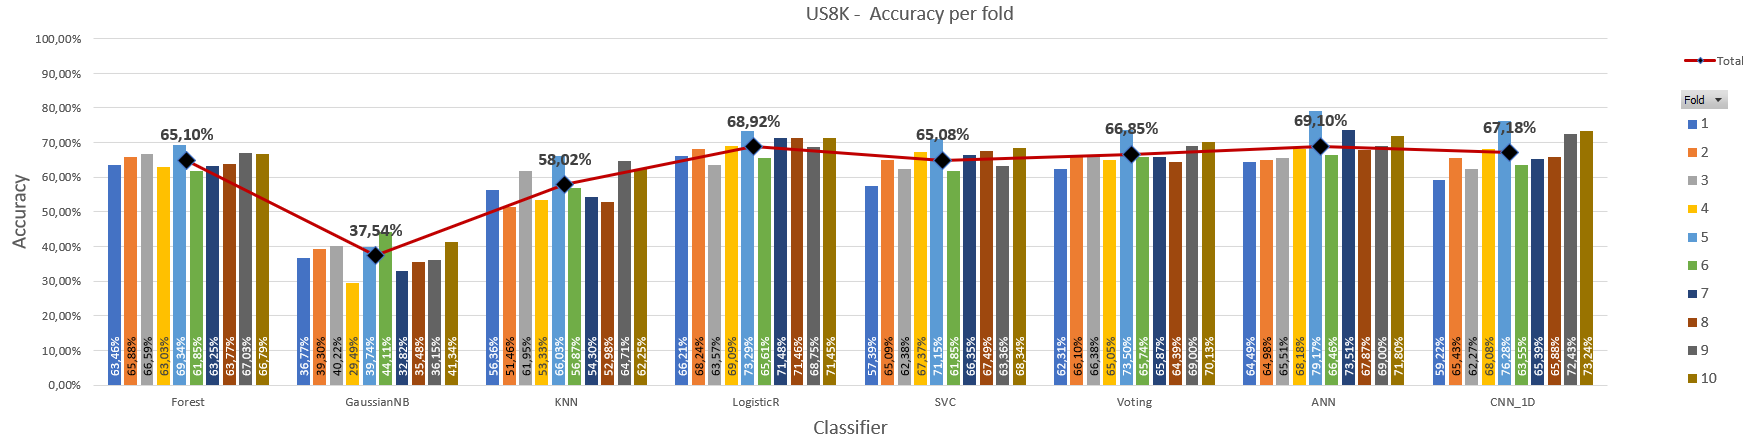

#### Comparison

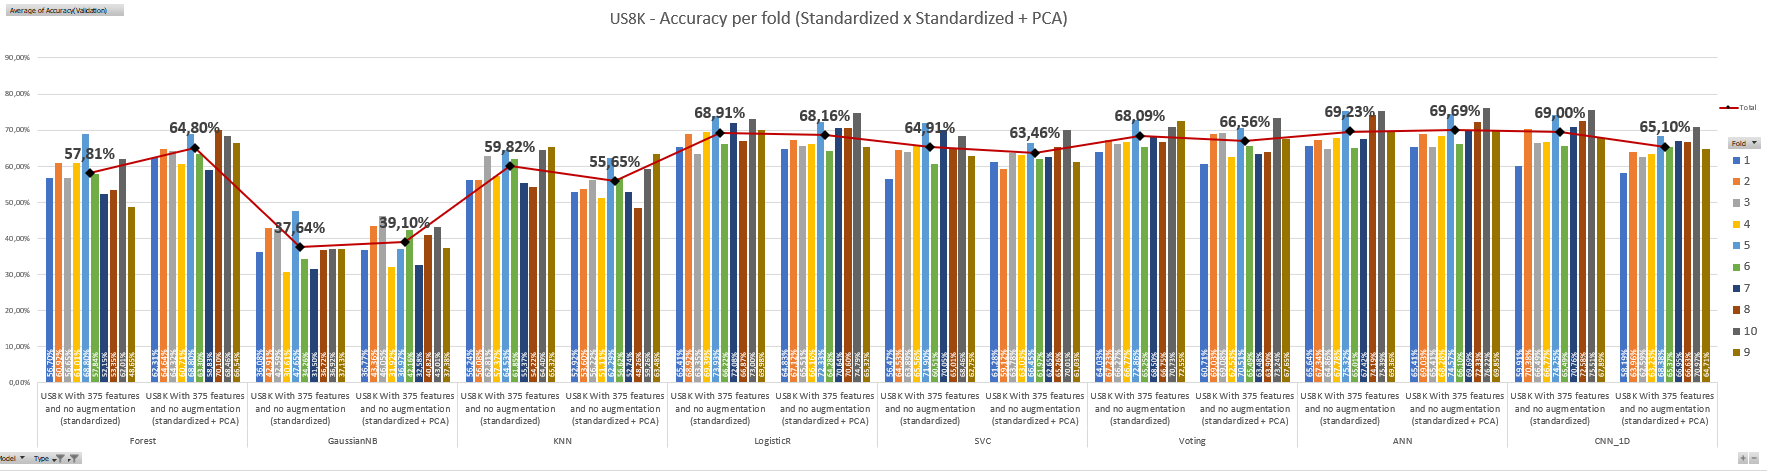


# End of the notebook

# 

# 

# 